In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
path = '/content/drive/MyDrive/changepay dataset'

## Familiarising with the dataset

In [55]:
import pandas as pd
import seaborn as sns

In [56]:
df = pd.read_csv(path)
df.head()

,External ID,Created,Modified,Order Short Number,Order Status,Item Total,Delivery Charges,Other Charges,Order Total,Rating Value,...,Order Order Item → Unit Price,Order Order Item → Product Sk U ID,Order Order Item → Unit Price With Addon,Order Order Item → Rating Val,Order Order Item → Business Comission,Customer → Profile Name,Cluster → Cluster Name,Payment V2 → Info → Pay Via,Delivery Fulfillment → Info → Delivery Address → Address ID,Delivery Fulfillment → Info → Delivery Address → Address Name
0,e72f9155-4ccb-4fbc-be6d-1c9957367197,2023-11-05T13:56:08.498625+05:30,2023-12-29T12:55:12.031871+05:30,05ccdc,COMPLETED,10000,0,500,10500,2.0,...,5000,355521,5000,2.0,0,Achar Aditya,"National Institute of Technology, Calicut",upi,db8d5d02-64d4-49ae-bb0b-135927833210,MAINROAD ENTRANCE GATE -MEGA BO
1,e72f9155-4ccb-4fbc-be6d-1c9957367197,2023-11-05T13:56:08.498625+05:30,2023-12-29T12:55:12.031871+05:30,05ccdc,COMPLETED,10000,0,500,10500,2.0,...,5000,355153,5000,4.0,0,Achar Aditya,"National Institute of Technology, Calicut",upi,db8d5d02-64d4-49ae-bb0b-135927833210,MAINROAD ENTRANCE GATE -MEGA BO
2,ab4d8e06-5f4e-428d-99a6-325d1d3593f7,2023-10-15T20:26:16.680547+05:30,2023-12-06T17:13:17.581218+05:30,d127a0,COMPLETED,72000,0,500,72500,NaN,...,72000,353317,72000,NaN,0,j.sri venkata gowtham,"National Institute of Technology, Calicut",upi,49a25fd6-c0af-46c3-a5b5-584f19293c22,BLOCK B
3,c32091f1-26a7-4664-bbf3-97b006b5d625,2023-10-14T16:20:14.76221+05:30,2023-12-06T17:13:17.532478+05:30,1601b8,COMPLETED,12000,0,500,12500,NaN,...,12000,353310,12000,NaN,0,Janhavi,"National Institute of Technology, Calicut",upi,09ea241e-2db2-42aa-b452-53e1f0b314cd,MAINROAD ENTRANCE Gate - MEGA
4,90fde31c-1be3-4857-a449-dd7b01679dd6,2023-09-25T20:13:01.833086+05:30,2023-12-06T17:13:17.473469+05:30,a31ea1,COMPLETED,200,0,0,200,NaN,...,100,352808,100,NaN,0,Madhusudan Agarwal,"National Institute of Technology, Calicut",upi,db8d5d02-64d4-49ae-bb0b-135927833210,MAINROAD-MEGA BOYS HOSTEL ENTRAN


## Removing the sensitive data

In [57]:
df = df.drop(['Order Order Item → Info → Sku Charges', 'Order Order Item → Business Comission', 'Customer → Profile Name'], axis=1)

## The fraction of orders that recieved a rating


In [58]:
ratingval = df['Rating Value'].count()/df['External ID'].count()
print(ratingval)

0.029577069409354523


## The fraction of orders that recieved a review

In [59]:
ratingcomm = df['Rating Comment'].count()/df['External ID'].count()
print(ratingcomm)

0.004067444319016646


## Number of unique products listed on the platform

In [60]:
unique_count = df['Order Order Item → Product Sk U ID'].nunique()
print(unique_count)

5579


In [61]:
column_names = df.columns.tolist()
for column in column_names:
    print(column)

External ID
Created
Modified
Order Short Number
Order Status
Item Total
Delivery Charges
Other Charges
Order Total
Rating Value
Rating Comment
Business ID
Customer ID
Offer Discount
Cluster ID
Order Status Modified Dt
Payment V2 ID
Platform Charge
Business Comission
Delivery Fulfillment ID
Business → Business Name
Order Order Item → ID
Order Order Item → Info → Product Name
Order Order Item → Info → Prop → Quant → Unit
Order Order Item → Info → Prop → Quant → Val
Order Order Item → Info → Sku Code
Order Order Item → Info → Unit Name
Order Order Item → Quantity
Order Order Item → Unit Price
Order Order Item → Product Sk U ID
Order Order Item → Unit Price With Addon
Order Order Item → Rating Val
Cluster → Cluster Name
Payment V2 → Info → Pay Via
Delivery Fulfillment → Info → Delivery Address → Address ID
Delivery Fulfillment → Info → Delivery Address → Address Name


In [62]:
num_columns = df.shape[1]
print(num_columns)

36


## Analysing the missing values in each column

In [63]:
columns_with_missing_values = df.isnull().sum()
print(columns_with_missing_values)

External ID                                                           0
Created                                                               0
Modified                                                              0
Order Short Number                                                    0
Order Status                                                          0
Item Total                                                            0
Delivery Charges                                                      0
Other Charges                                                         0
Order Total                                                           0
Rating Value                                                     162475
Rating Comment                                                   166746
Business ID                                                           0
Customer ID                                                           0
Offer Discount                                                  

## Removing test cases and irrelevant columns

### Removing the test orders so we only have the genuine order data

In [64]:
condition = 'test'
df = df[~df['Order Order Item → Info → Product Name'].str.lower().str.contains(condition.lower())]

<ipython-input-65-753ca5bff919>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

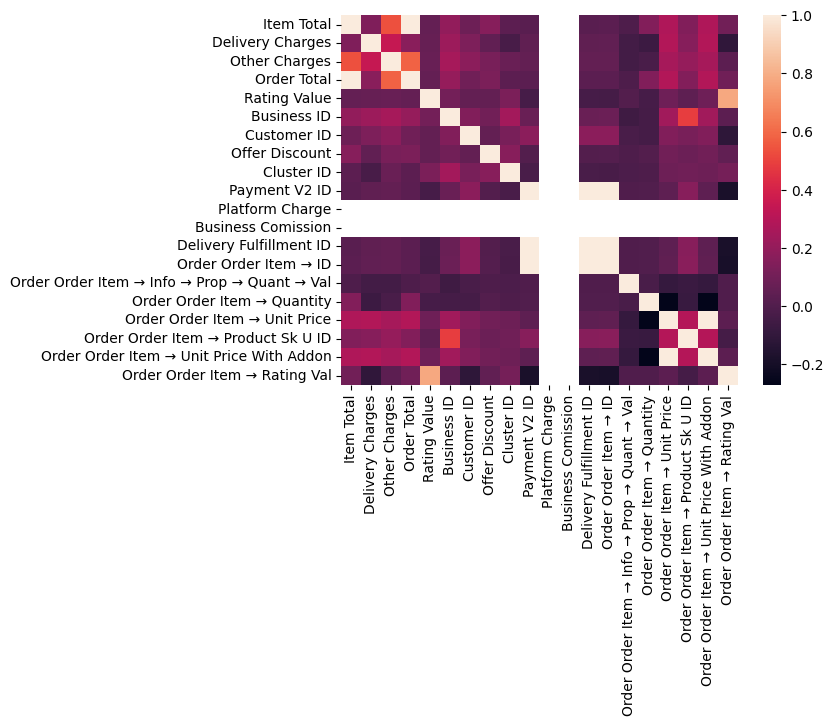

In [65]:
corr = df.corr()
sns.heatmap(corr)



### Removing columns that are very highly correlated with another column (hence redundant) or have irrelevant data/too less data

In [66]:
df = df.drop(['Order Order Item → Info → Unit Name'], axis=1)
df = df.dropna(subset=['Delivery Fulfillment → Info → Delivery Address → Address ID', 'Delivery Fulfillment → Info → Delivery Address → Address Name'])

In [67]:
df = df.drop(['Order Status'], axis=1)

In [68]:
df = df.drop(['Cluster → Cluster Name'], axis=1)

In [69]:
df=df.drop(['Rating Comment'], axis=1)

In [70]:
df = df.drop(['External ID'], axis=1)

In [71]:
df = df.drop(['Payment V2 ID'], axis=1)

In [72]:
df = df.drop(['Business Comission'], axis=1)

In [73]:
df = df.drop(['Order Order Item → Rating Val'], axis=1)

In [74]:
df = df.drop(['Delivery Fulfillment ID'], axis=1)

In [75]:
df = df.drop(['Platform Charge'], axis=1)

In [76]:
df = df.drop(['Order Order Item → Info → Prop → Quant → Unit'], axis=1)

In [77]:
df = df.drop(['Order Order Item → Info → Prop → Quant → Val'], axis=1)

In [78]:
df = df.drop(['Order Order Item → Unit Price With Addon'], axis=1)

##Conversion of Monetary Attributes to Standard Units

The dataset had a flaw - All the prices were wrongly interpreted with 2 trailing zeroes. We figured the error was the decimal point was missing. Hence an order of value 100.00 was listed as 10000

In [79]:
monetary_cols = ['Item Total', 'Delivery Charges', 'Other Charges', 'Order Total', 'Offer Discount', 'Order Order Item → Unit Price']

# Divide the values in the specified columns by 100
df[monetary_cols] = df[monetary_cols] / 100


In [80]:
df

,Created,Modified,Order Short Number,Item Total,Delivery Charges,Other Charges,Order Total,Rating Value,Business ID,Customer ID,...,Business → Business Name,Order Order Item → ID,Order Order Item → Info → Product Name,Order Order Item → Info → Sku Code,Order Order Item → Quantity,Order Order Item → Unit Price,Order Order Item → Product Sk U ID,Payment V2 → Info → Pay Via,Delivery Fulfillment → Info → Delivery Address → Address ID,Delivery Fulfillment → Info → Delivery Address → Address Name
0,2023-11-05T13:56:08.498625+05:30,2023-12-29T12:55:12.031871+05:30,05ccdc,100.0,0.0,5.00,105.00,2.0,8786,61014,...,ZAIKA RESTAURANT,1662517,Egg Parotta Sandwich,31648528592,1,50.0,355521,upi,db8d5d02-64d4-49ae-bb0b-135927833210,MAINROAD ENTRANCE GATE -MEGA BO
1,2023-11-05T13:56:08.498625+05:30,2023-12-29T12:55:12.031871+05:30,05ccdc,100.0,0.0,5.00,105.00,2.0,8786,61014,...,ZAIKA RESTAURANT,1662518,Omelette Burger,31612793842,1,50.0,355153,upi,db8d5d02-64d4-49ae-bb0b-135927833210,MAINROAD ENTRANCE GATE -MEGA BO
2,2023-10-15T20:26:16.680547+05:30,2023-12-06T17:13:17.581218+05:30,d127a0,720.0,0.0,5.00,725.00,NaN,8753,61524,...,FOODIE'S RESTAURANT,1600475,Peri Peri Mandhi,3147727652,1,720.0,353317,upi,49a25fd6-c0af-46c3-a5b5-584f19293c22,BLOCK B
3,2023-10-14T16:20:14.76221+05:30,2023-12-06T17:13:17.532478+05:30,1601b8,120.0,0.0,5.00,125.00,NaN,8753,61421,...,FOODIE'S RESTAURANT,1594604,Hyderabadi Biryani,31476910635,1,120.0,353310,upi,09ea241e-2db2-42aa-b452-53e1f0b314cd,MAINROAD ENTRANCE Gate - MEGA
7,2023-10-16T18:08:19.088519+05:30,2023-12-06T17:13:17.330249+05:30,472d13,450.0,0.0,5.00,435.00,NaN,8753,61246,...,FOODIE'S RESTAURANT,1602916,Chicken Noodles,3147163779,3,150.0,353251,upi,49a25fd6-c0af-46c3-a5b5-584f19293c22,BLOCK B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167422,2023-06-04T14:11:00.506763+05:30,2023-06-07T22:19:43.517893+05:30,993f81,120.0,0.0,10.00,130.00,NaN,5391,44898,...,Vaibhav Pure Veg,1300242,Poori Bhaji,snacsnacpoor,2,60.0,180338,upi,30941296-5393-494d-8e8f-06a8c82ed66c,NIH C Block / MIT students
167423,2023-06-04T11:52:50.666237+05:30,2023-06-07T22:23:08.587979+05:30,47981a,205.0,0.0,20.75,225.75,NaN,5611,35267,...,SAIBA MAHE - Food court,1299952,Chicken Kheema Pulav,16695143128,1,205.0,189512,upi,c33cc576-888c-4630-895e-8fc6b977dac5,Sharada Block
167424,2023-06-04T09:35:43.365282+05:30,2023-06-07T22:24:03.920719+05:30,5b8d37,100.0,0.0,15.00,115.00,NaN,5391,45897,...,Vaibhav Pure Veg,1299785,Extra Curd,18005470387,1,10.0,204552,upi,2e963897-7e9e-4142-854c-c54f5b01c4ec,Indira Block
167425,2023-06-04T09:35:43.365282+05:30,2023-06-07T22:24:03.920719+05:30,5b8d37,100.0,0.0,15.00,115.00,NaN,5391,45897,...,Vaibhav Pure Veg,1299786,Aloo Gobi Parotta,paroparoaloo,1,80.0,180416,upi,2e963897-7e9e-4142-854c-c54f5b01c4ec,Indira Block


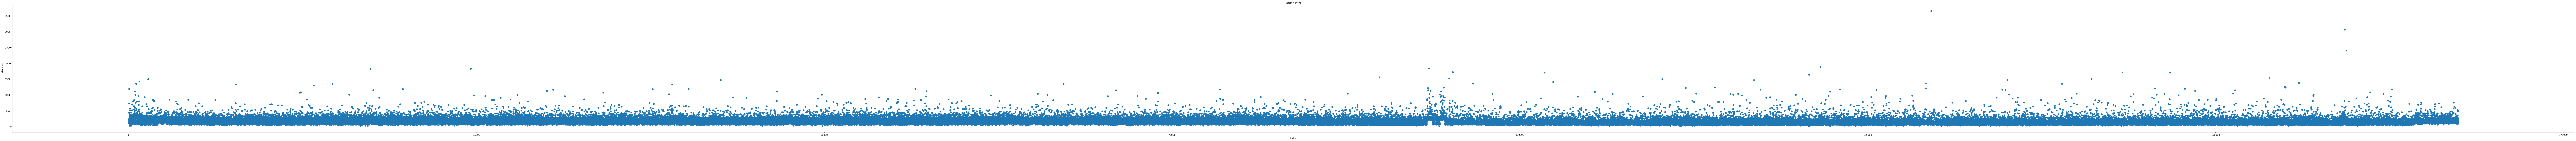

In [81]:
from matplotlib import pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(200, 10))  # Adjust the figsize as needed
plt.scatter(df.index, df['Order Total'])
plt.title('Order Total')
plt.xlabel('Index')  # You might want to replace 'Index' with the actual label for your x-axis
plt.ylabel('Order Total')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


##Central Tendency Measures

In [82]:
columns = ['Item Total',
   'Delivery Charges',
   'Other Charges',
   'Order Total',
   'Offer Discount',
   'Order Order Item → Unit Price',
   'Order Order Item → Quantity']
df[columns].describe()

,Item Total,Delivery Charges,Other Charges,Order Total,Offer Discount,Order Order Item → Unit Price,Order Order Item → Quantity
count,165950.000000,165950.000000,165950.000000,165950.000000,165950.000000,165950.000000,165950.000000
mean,184.712670,1.704218,10.525612,195.808560,1.133941,81.168297,1.222302
std,127.591441,2.755207,6.963151,131.225377,4.601279,46.270097,0.739562
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000
25%,105.000000,0.000000,7.000000,117.000000,0.000000,45.000000,1.000000
50%,155.000000,0.000000,8.000000,166.000000,0.000000,80.000000,1.000000
75%,225.000000,5.000000,13.000000,237.000000,0.000000,105.000000,1.000000
max,3645.000000,30.000000,142.000000,3652.000000,197.000000,1299.000000,35.000000


##Correlation between attributes





In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

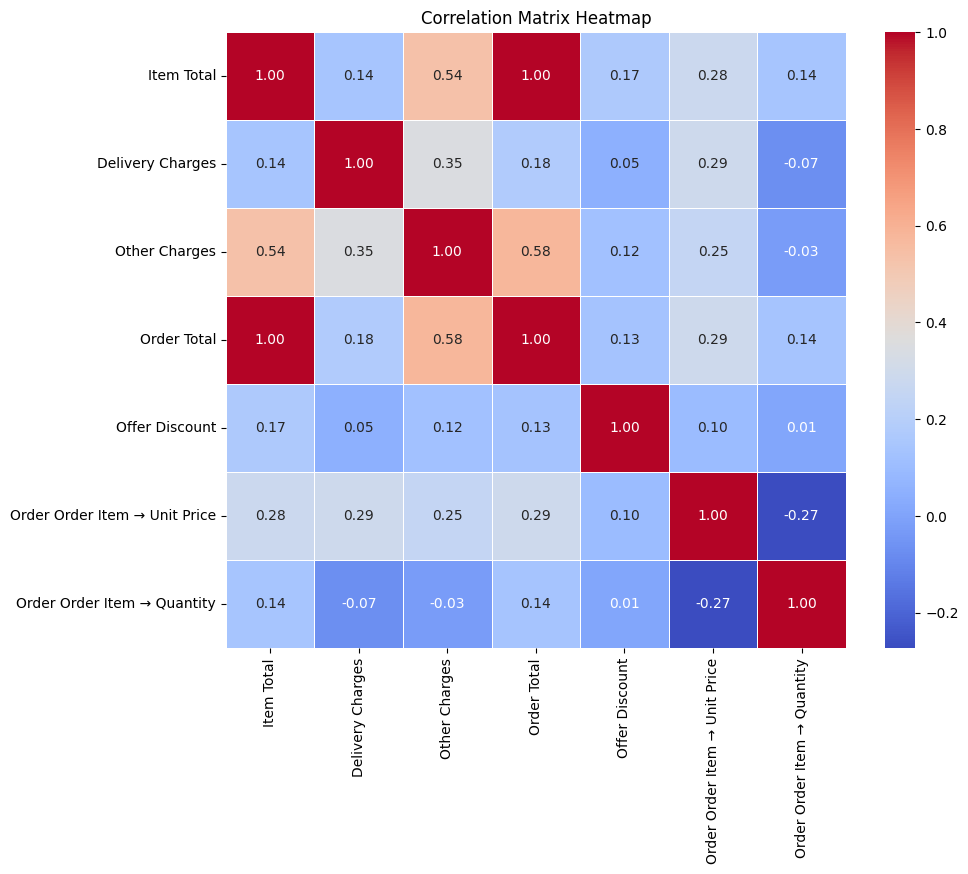

In [84]:
# columns.remove('Platform Charge')
numeric_df = df[columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###**Observations**:


- Most of the correlations are quite obvious, Order total increases with item total, item total has a decent correlation with other charges and with order total.
- One interesting observation is that quantity has a negative correlation with unit price, possibly implying people are less likely to buy food that is costly.
- Item Total is very strongly correlated with order total, Item total is basically the cost of the order stripping out the delivery and misc charges, this means the delivery and misc charges are next to none.


### Item Price vs Quantity analysis

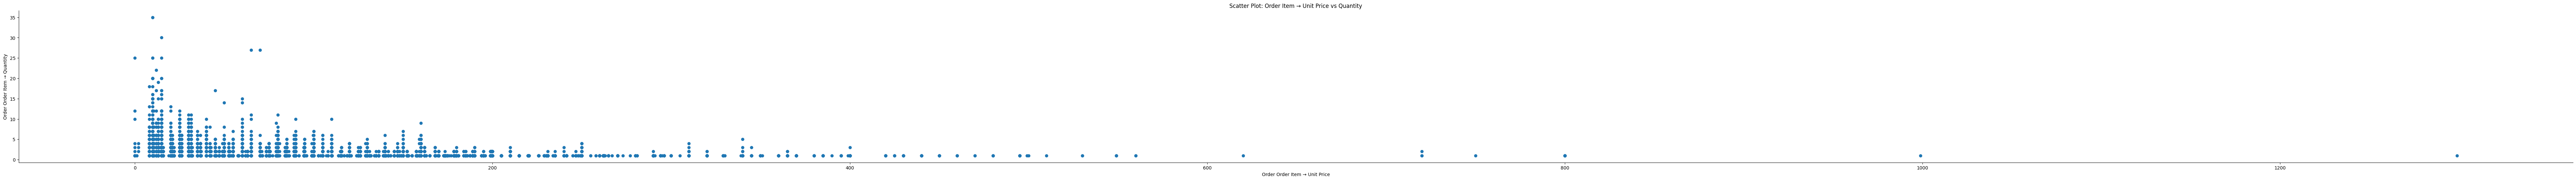

In [85]:
from matplotlib import pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(100, 6))  # Adjust the figsize as needed
plt.scatter(df['Order Order Item → Unit Price'], df['Order Order Item → Quantity'])
plt.title('Scatter Plot: Order Item → Unit Price vs Quantity')
plt.xlabel('Order Order Item → Unit Price')
plt.ylabel('Order Order Item → Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


As we found out in the correlation matrix, the quantity (units/portions) bought is significantly higher when the price per unit is less.

##Item wise Analysis

The dataset is on an item level - meaning an order that had 3 items is split into 3 rows with each item in one row.

Although this makes thr grouping harder later on to suggest baskets, we will be exploiting this nature of the dataset for now to make item level analysis, irrespective of what was bought together

### Distribution of Unit price

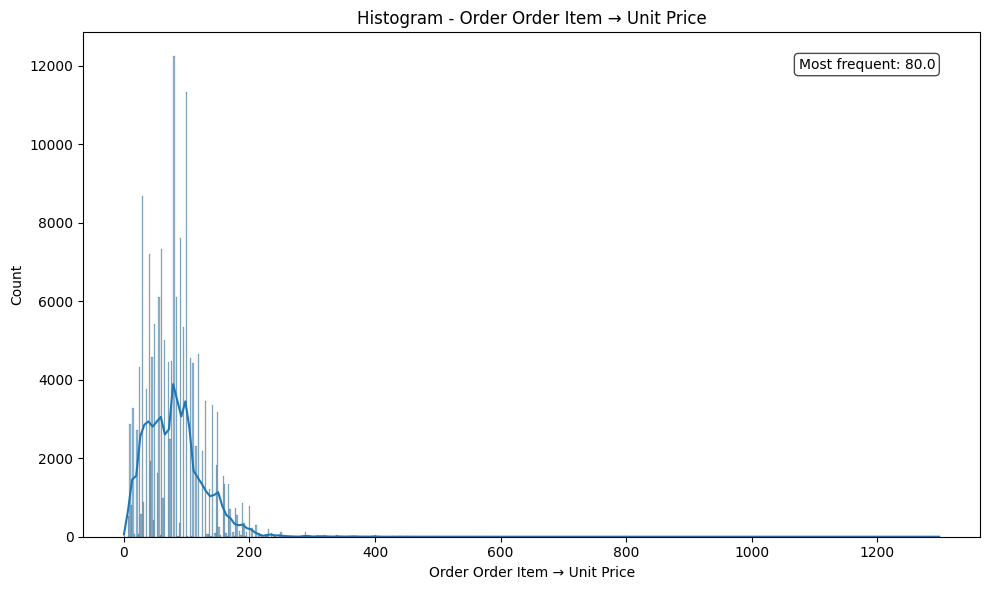

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

columns_to_plot = ['Order Order Item → Unit Price']
subset_df = df[columns_to_plot]
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 6 * len(columns_to_plot)))
axes = np.ravel(axes)
for i, column in enumerate(columns_to_plot):
    sns.histplot(subset_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram - {column}')
    highest_count_value = subset_df[column].mode().values[0]
    axes[i].text(0.95, 0.95, f'Most frequent: {highest_count_value}',
                 transform=axes[i].transAxes,
                 ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

This is the distribution of the unit price. We can see it is heavily skewed towards the left, meaning almost all dishes ordered (per 1 unit) cost less than 200

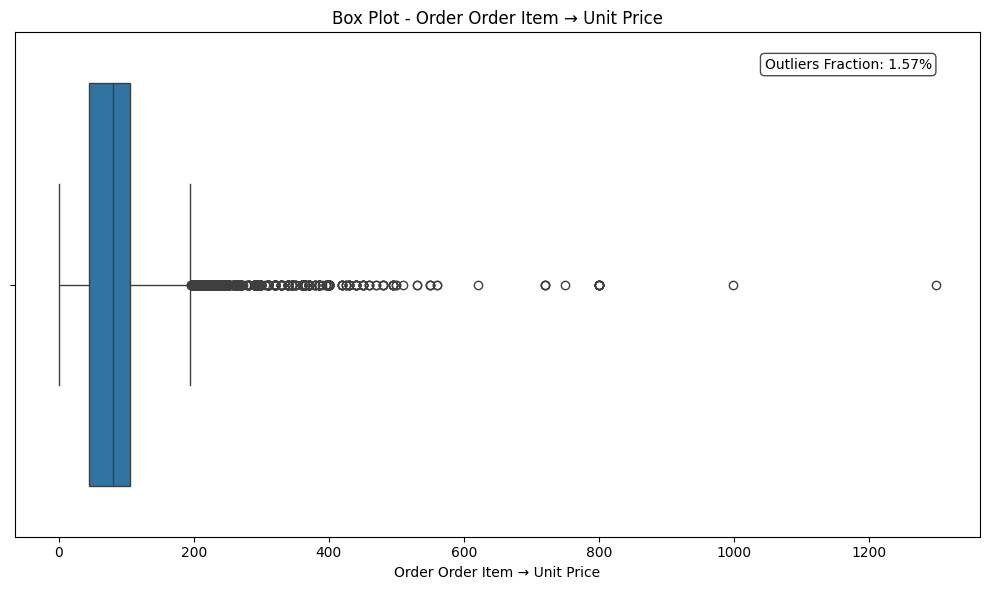

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

columns_to_plot = ['Order Order Item → Unit Price', ]
subset_df = df[columns_to_plot]
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 6 * len(columns_to_plot)))
axes = np.ravel(axes)
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=subset_df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')
    Q1 = subset_df[column].quantile(0.25)
    Q3 = subset_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_fraction = ((subset_df[column] < lower_bound) | (subset_df[column] > upper_bound)).mean()
    axes[i].text(0.95, 0.95, f'Outliers Fraction: {outliers_fraction:.2%}',
                 transform=axes[i].transAxes,
                 ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.tight_layout()
plt.show()




As observed earlier, the outliers fraction is very less - 1.57%

### The Top 10s - Popularity, Products, Prices and Revenue

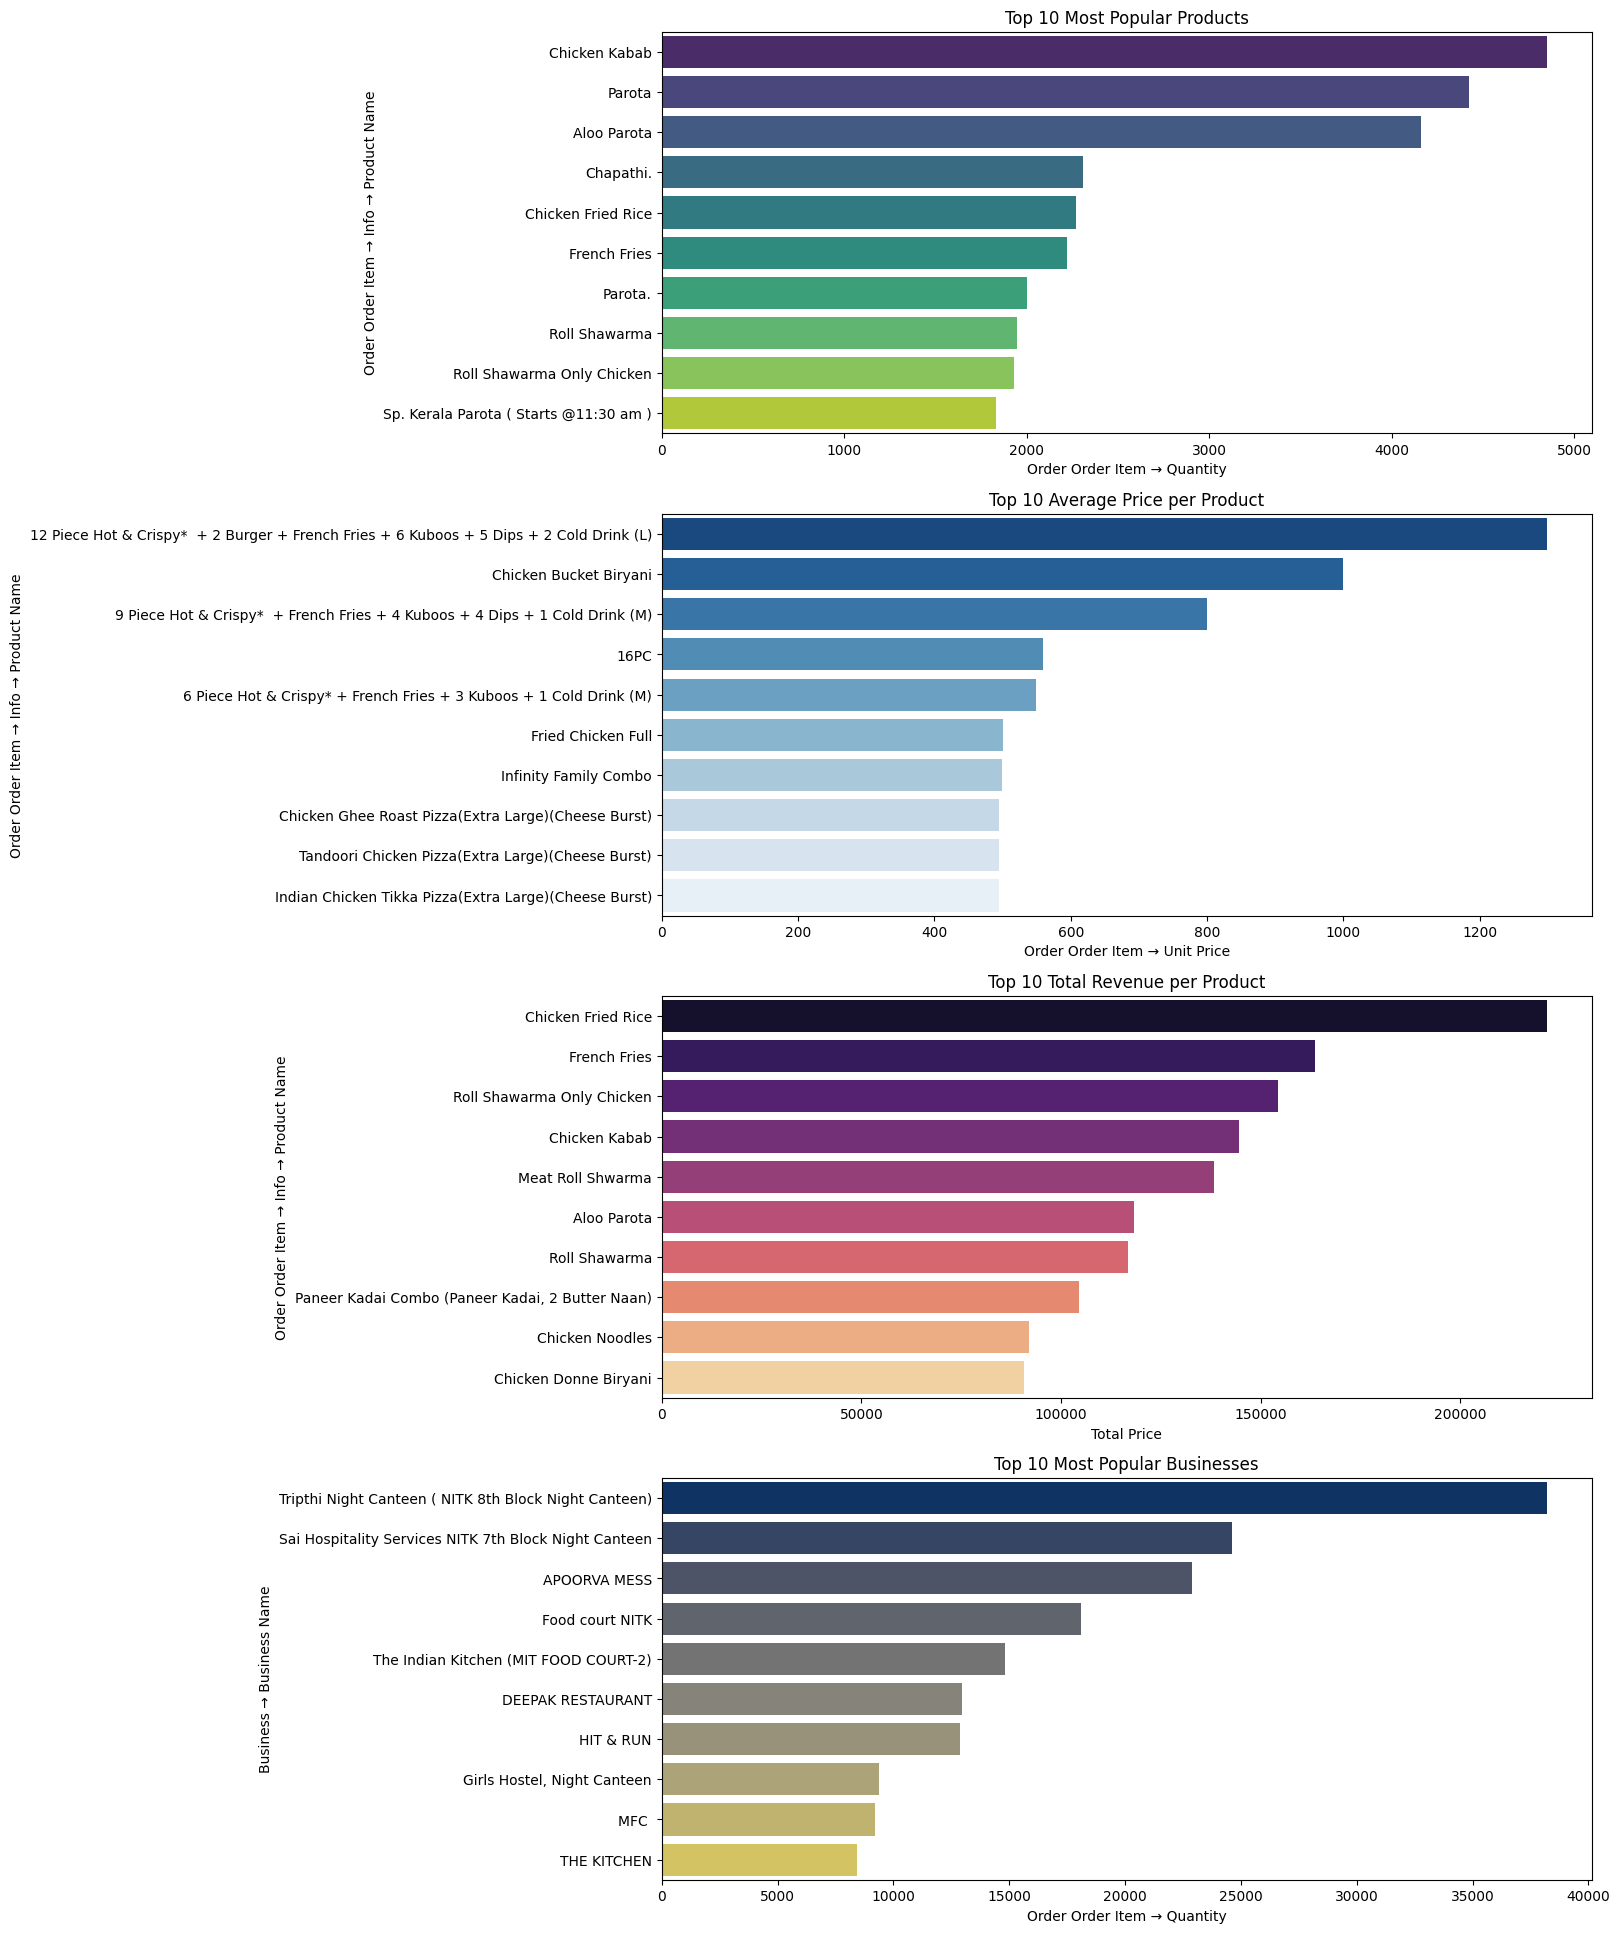

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
columns_for_analysis = ['Business → Business Name', 'Order Order Item → Info → Product Name', 'Order Order Item → Quantity', 'Order Order Item → Unit Price']
# Create a subset DataFrame with columns for analysis
product_df = df[columns_for_analysis].copy()
# Calculate total price per item
product_df['Total Price'] = product_df['Order Order Item → Quantity'] * product_df['Order Order Item → Unit Price']
# Product popularity analysis
popularity_df = product_df.groupby('Order Order Item → Info → Product Name')['Order Order Item → Quantity'].sum().reset_index().sort_values(by='Order Order Item → Quantity', ascending=False)
top_popular_products = popularity_df.head(10)
# Average price per product
average_price_df = product_df.groupby('Order Order Item → Info → Product Name')['Order Order Item → Unit Price'].mean().reset_index().sort_values(by='Order Order Item → Unit Price', ascending=False)
top_avg_price_products = average_price_df.head(10)
# Total revenue per product
total_revenue_df = product_df.groupby('Order Order Item → Info → Product Name')['Total Price'].sum().reset_index().sort_values(by='Total Price', ascending=False)
top_revenue_products = total_revenue_df.head(10)
# Business popularity analysis
business_popularity_df = product_df.groupby('Business → Business Name')['Order Order Item → Quantity'].sum().reset_index().sort_values(by='Order Order Item → Quantity', ascending=False)
top_popular_businesses = business_popularity_df.head(10)
fig, axes = plt.subplots(nrows=4, figsize=(12, 24))

# Plot top 10 most popular products
sns.barplot(x='Order Order Item → Quantity', y='Order Order Item → Info → Product Name', hue='Order Order Item → Info → Product Name', data=top_popular_products, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Top 10 Most Popular Products')

# Plot top 10 average price per product
sns.barplot(x='Order Order Item → Unit Price', y='Order Order Item → Info → Product Name', hue='Order Order Item → Info → Product Name', data=top_avg_price_products, ax=axes[1], palette='Blues_r', legend=False)
axes[1].set_title('Top 10 Average Price per Product')

# Plot top 10 total revenue per product
sns.barplot(x='Total Price', y='Order Order Item → Info → Product Name', hue='Order Order Item → Info → Product Name', data=top_revenue_products, ax=axes[2], palette='magma', legend=False)
axes[2].set_title('Top 10 Total Revenue per Product')

# Plot top 10 most popular businesses
sns.barplot(x='Order Order Item → Quantity', y='Business → Business Name', hue='Business → Business Name', data=top_popular_businesses, ax=axes[3], palette='cividis', legend=False)
axes[3].set_title('Top 10 Most Popular Businesses')

plt.show()


These plots represent the dominant food items based on different parameters.
- Based on popularity (Most ordered)
- Based on average price per product (1 unit) (top 10 priciest items)
- Based on total revenue generated by the said item
- Lastly a plot representing the popularity of food outlets based on the quantity of orders that they serve.

### Top Businesses by revenue

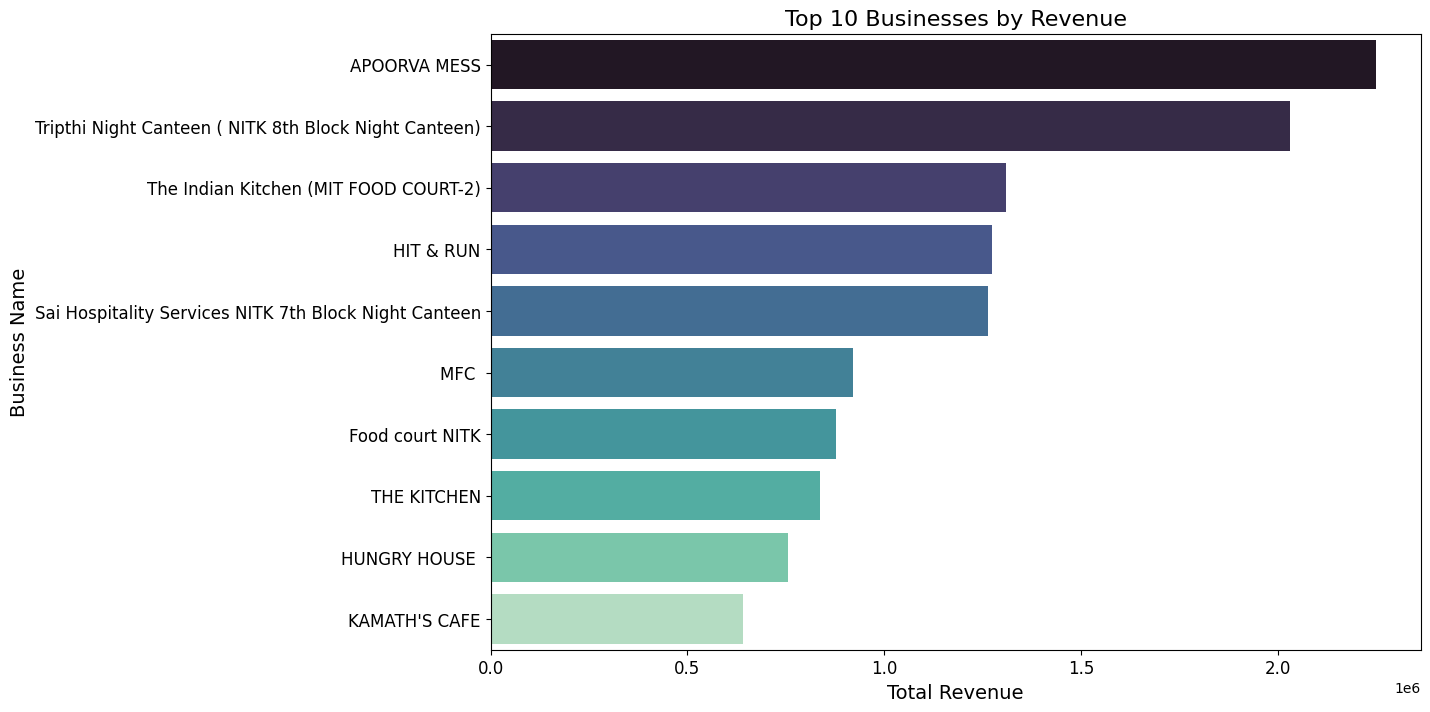

In [89]:

columns_for_analysis = ['Business → Business Name', 'Order Order Item → Info → Product Name', 'Order Order Item → Quantity', 'Order Order Item → Unit Price']
product_df = df[columns_for_analysis].copy()
product_df['Total Price'] = product_df['Order Order Item → Quantity'] * product_df['Order Order Item → Unit Price']

# Total revenue per business
total_revenue_per_business = product_df.groupby('Business → Business Name')['Total Price'].sum().reset_index().sort_values(by='Total Price', ascending=False)

# top 10 businesses
top_revenue_businesses = total_revenue_per_business.head(10)

# Plot top 10 businesses by revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Price', y='Business → Business Name',hue='Business → Business Name', data=top_revenue_businesses, palette='mako')
plt.title('Top 10 Businesses by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Business Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


But like we can see, although Block 8 night canteen sells the most number of items, it doesn't generate the most renvenue. We can analyse the revenue per items to see which outlet has the costliest products in general.

### Average revenue per Item, for each business

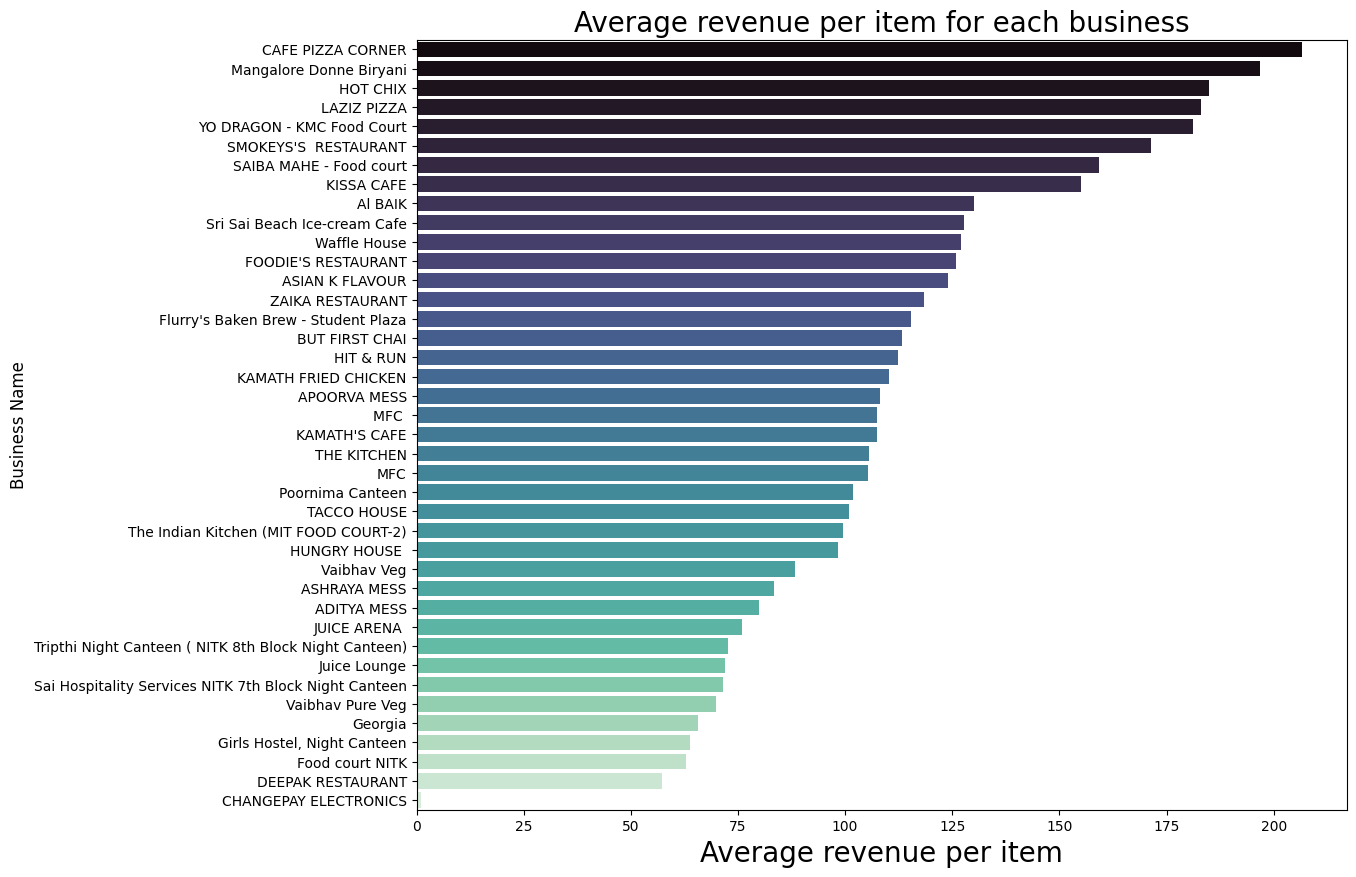

In [90]:
# Average revenue per item for each business
average_revenue_per_item = product_df.groupby('Business → Business Name')['Total Price'].mean().reset_index().sort_values(by='Total Price', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Total Price', y='Business → Business Name', hue='Business → Business Name', data=average_revenue_per_item, palette='mako')
plt.title('Average revenue per item for each business', fontsize=20)
plt.xlabel('Average revenue per item', fontsize=20)
plt.ylabel('Business Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


As we can see, the average revenue generated by each business per item follows a completely different distribution.
- This is also an indicator of how costly an item is at these places in general
- The most revenue needn't be generated by the place that makes the most money on every order, because the number of orders will go down (We saw the negative correlation between quantity and unit price)
- We can find the sweet spot of averag item price that will help us maximize the order quantity(number) while keeping the prices affordable

In [91]:
from collections import Counter
from itertools import combinations

columns_for_analysis = ['Order Short Number', 'Order Order Item → Info → Product Name']
product_df = df[columns_for_analysis].copy()
# Convert Order Short Number to string to avoid numerical issues
product_df['Order Short Number'] = product_df['Order Short Number'].astype(str)
# Group by order and create lists of products in each order
orders = product_df.groupby('Order Short Number')['Order Order Item → Info → Product Name'].agg(list).reset_index()
item_tuples_count = Counter()
# Iterate through each order and update item counts for triples and quadruples
for products in orders['Order Order Item → Info → Product Name']:
    sorted_products = sorted(products)
    item_tuples_count.update(Counter(combinations(sorted_products, 2)))
    item_tuples_count.update(Counter(combinations(sorted_products, 3)))
    item_tuples_count.update(Counter(combinations(sorted_products, 4)))

item_tuples_df = pd.DataFrame(list(item_tuples_count.items()), columns=['Item Tuple', 'Count'])
item_tuples_df = item_tuples_df.sort_values(by='Count', ascending=False)

print(item_tuples_df.head(15))


                                             Item Tuple  Count
61                      (Chicken Kabab, Egg Fried Rice)    242
1361                (Chicken Fried Rice, Chicken Kabab)    209
458         (Chicken Kabab, Roll Shawarma Only Chicken)    202
684                             (Chicken Kabab, Parota)    179
91    (Paneer Butter Masala( Starts @11:30 am ), Sp....    131
4368                   (Chicken Biryani, Chicken Kabab)    123
3156                 (Chicken Kabab, Meat Roll Shwarma)    120
2190                        (Chapati from 12pm, Parota)    114
1089  (Paneer Ghee Roast( Starts @11:30 am ), Sp. Ke...    112
8                 (Butter Naan., Paneer Butter Masala.)    109
618                    (Chicken Kabab, Chicken Noodles)    107
1743                     (Naan., Paneer Butter Masala.)    105
2575  (Chicken Popcorn (8 Pcs), Chipotle Chicken Bur...    103
1721                           (Chicken Masala, Parota)     98
420                                  (Chapathi, Parota)

Here we are grouping the items bought together on the same order based on the order ID, we can see the most ordered combos, the number of times they were bought together.

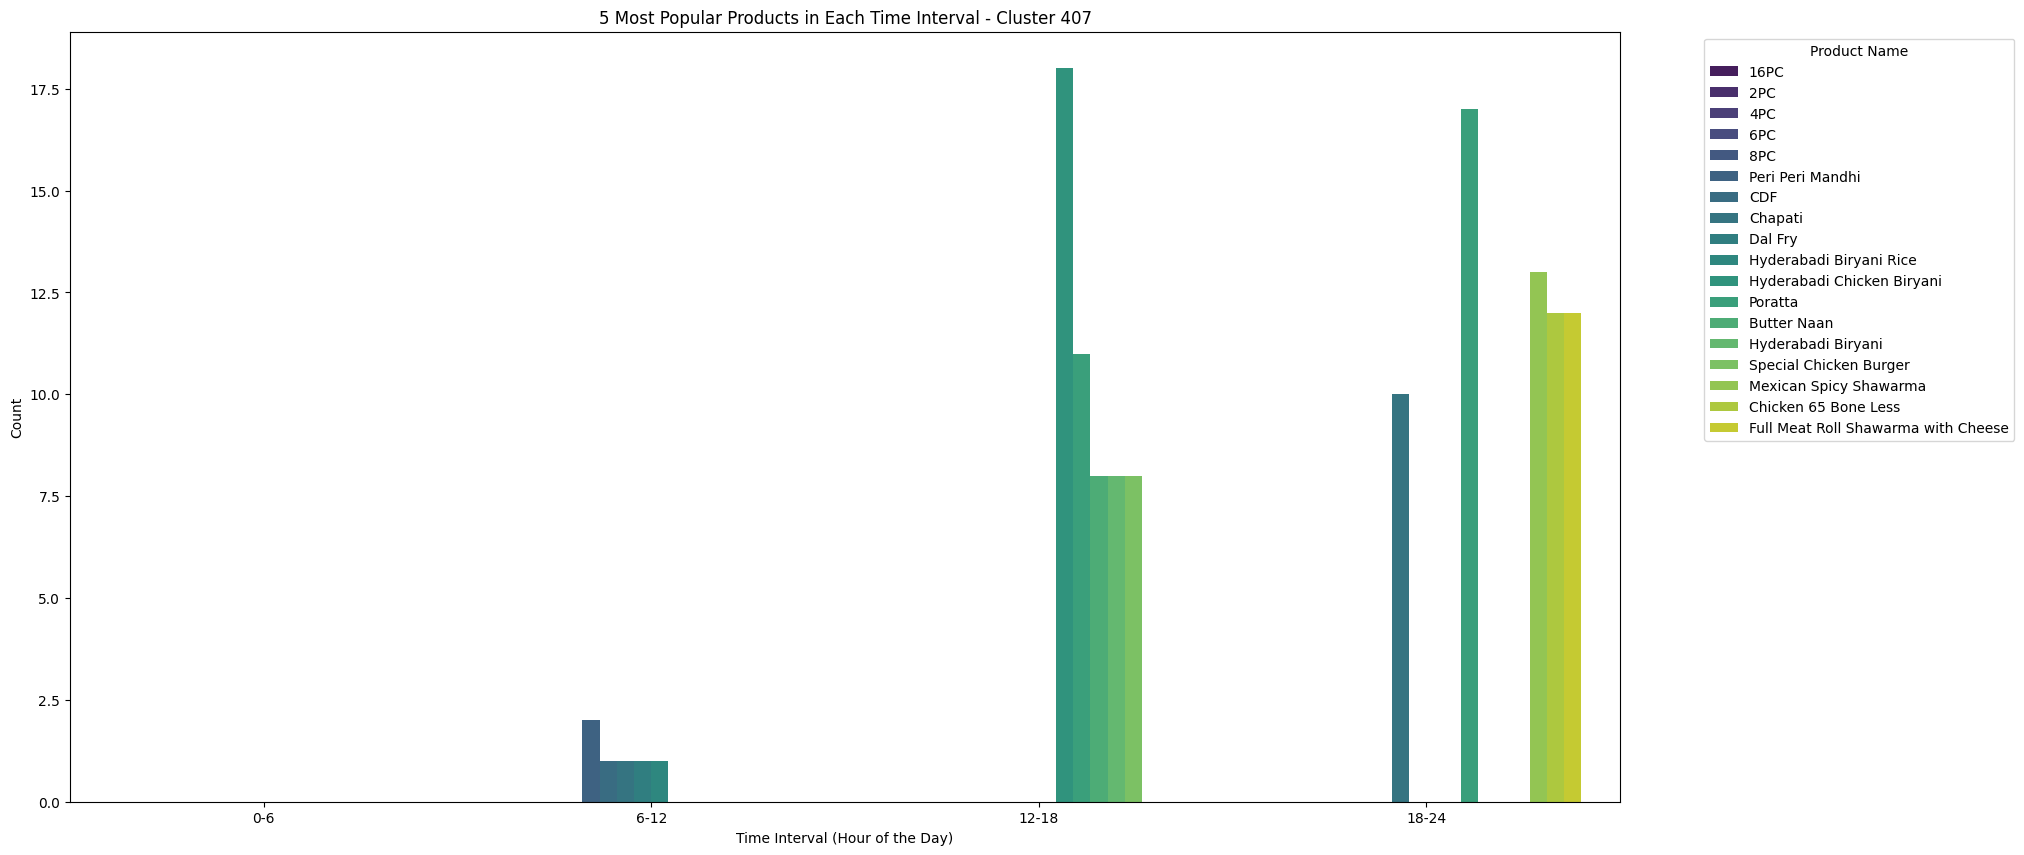

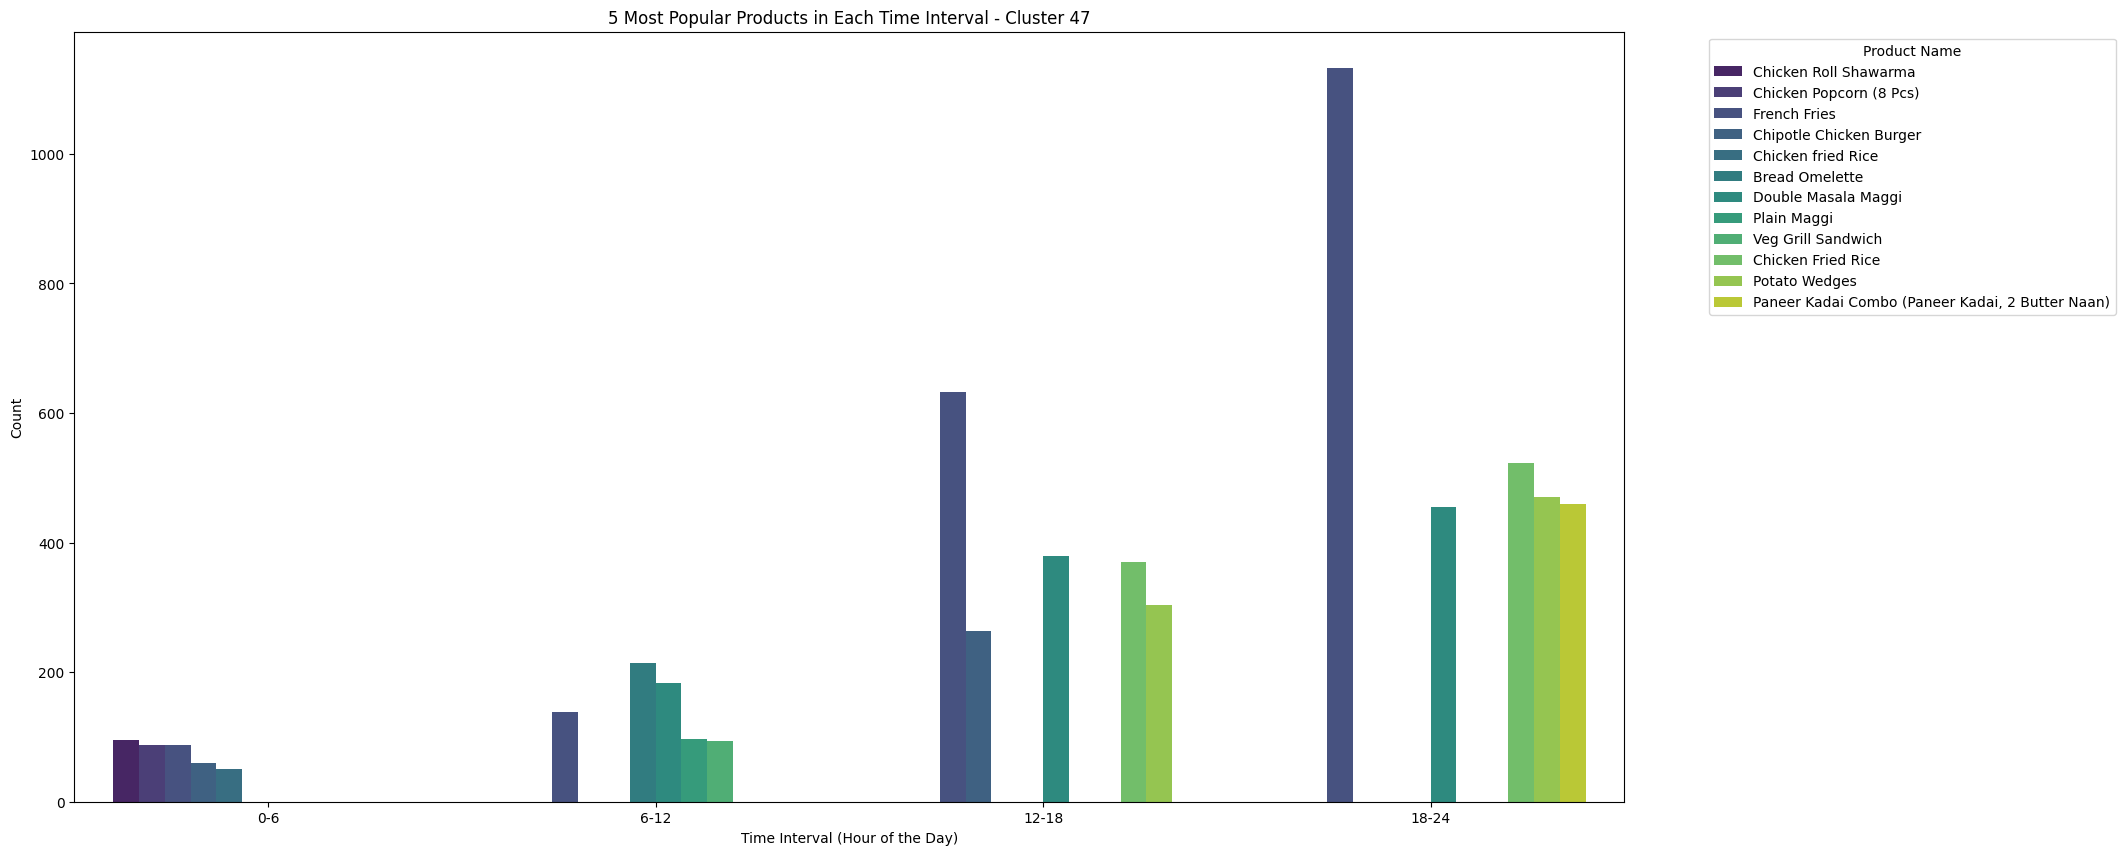

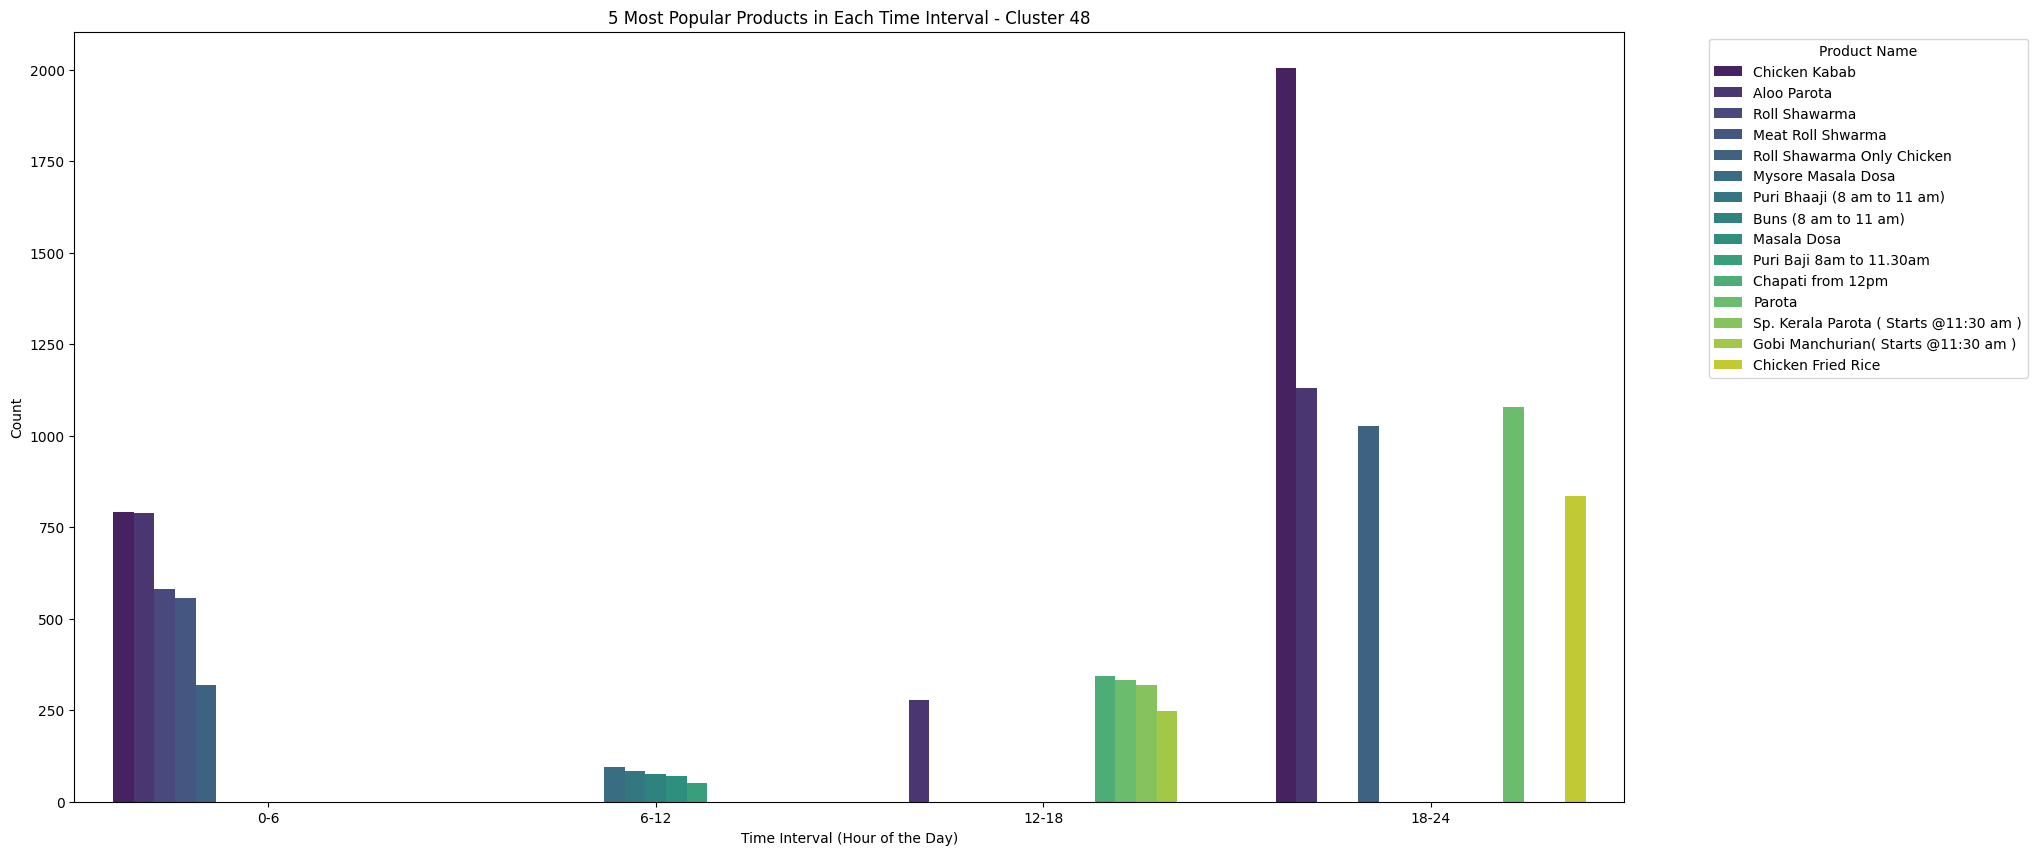

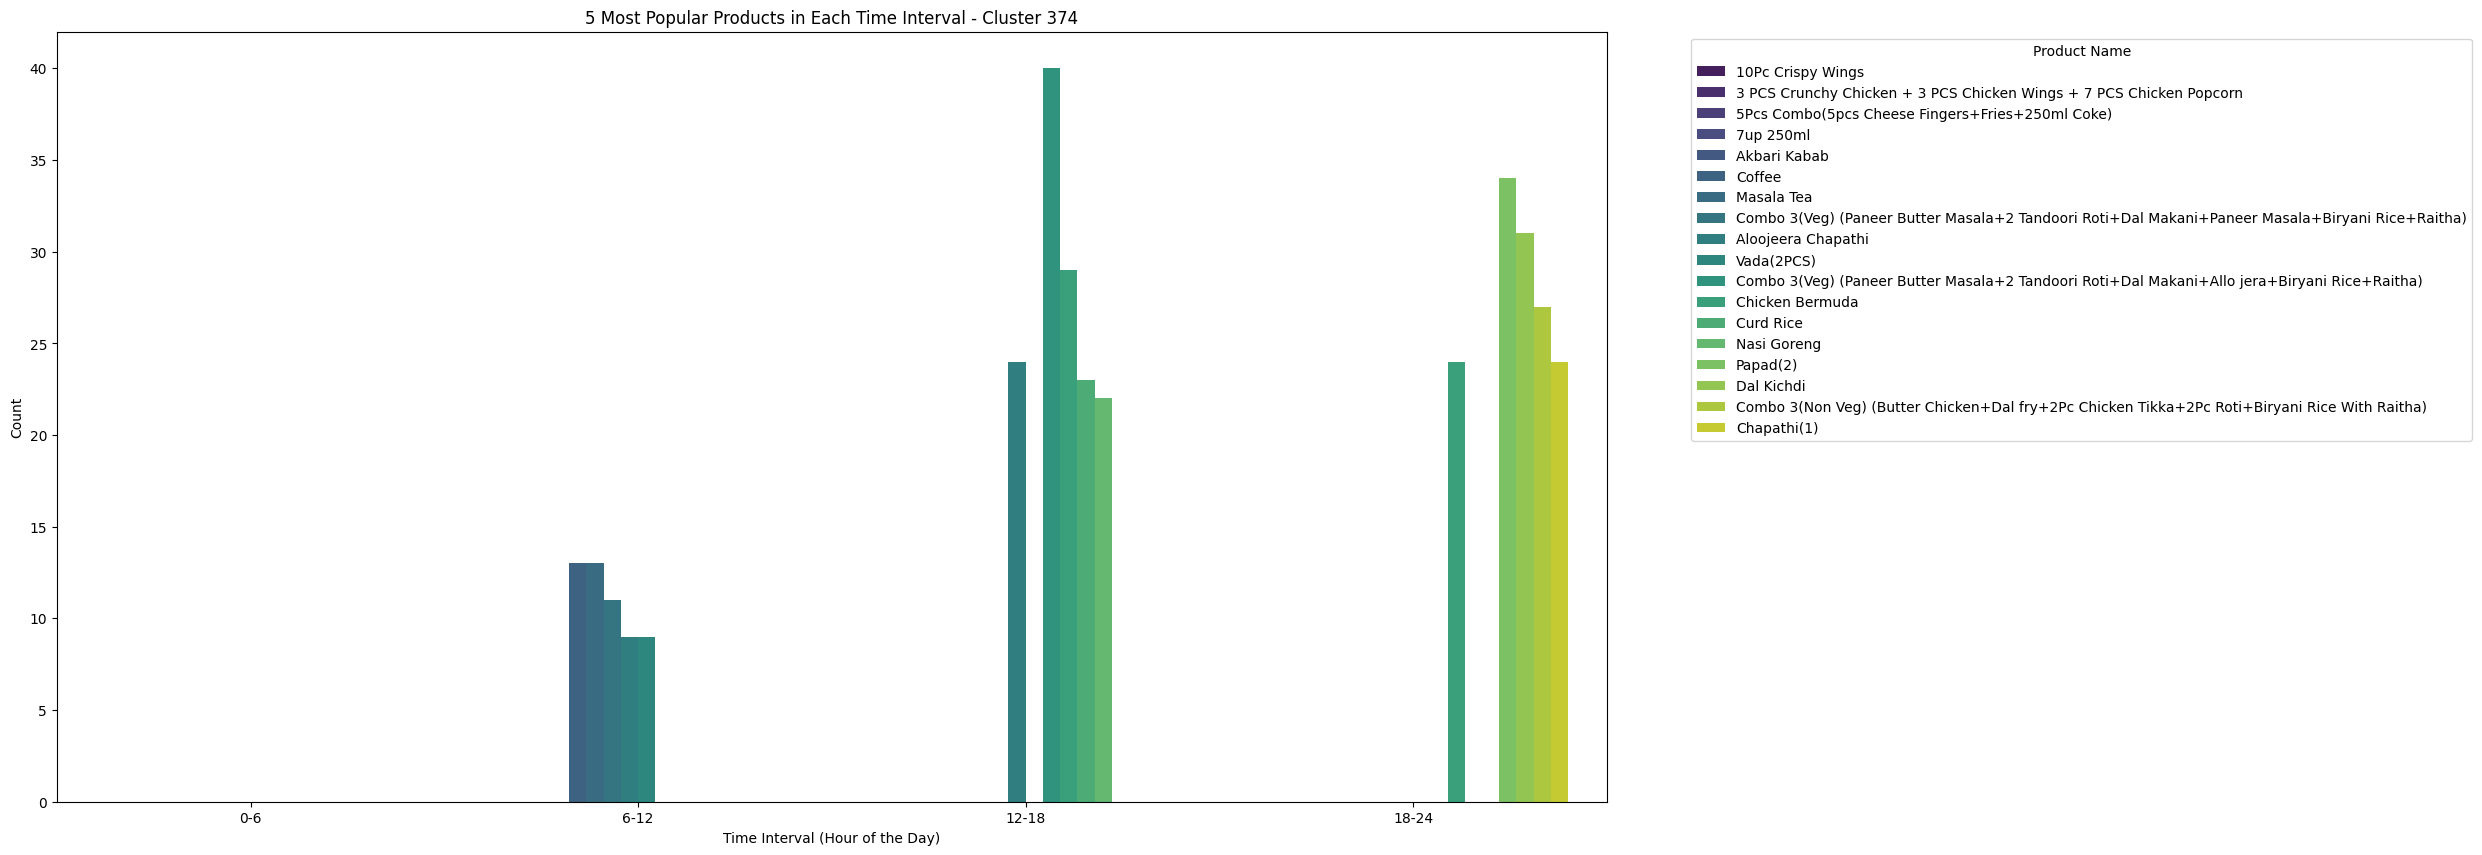

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Created'] = pd.to_datetime(df['Created'])
df['Hour'] = df['Created'].dt.hour
df['Time Interval'] = pd.cut(df['Hour'], bins=4, labels=['0-6', '6-12', '12-18', '18-24'])

unique_clusters = df['Cluster ID'].unique()

for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster ID'] == cluster_id]

    # Get the 5 most popular product names for each time interval
    top_products = (
        cluster_data.groupby(['Time Interval', 'Order Order Item → Info → Product Name'])
        .size()
        .reset_index(name='Count')
        .sort_values(by=['Time Interval', 'Count'], ascending=[True, False])
        .groupby('Time Interval')
        .head(5)
    )

    plt.figure(figsize=(20, 10))
    sns.barplot(x='Time Interval', y='Count', hue='Order Order Item → Info → Product Name', data=top_products, palette='viridis')

    plt.title(f'5 Most Popular Products in Each Time Interval - Cluster {cluster_id}')
    plt.xlabel('Time Interval (Hour of the Day)')
    plt.ylabel('Count')

    plt.legend(title='Product Name', title_fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Plots representing the 5 most popular items with respect to time of the day, and also the number of orders being served at that time of the day.

We can observe that most orders are in the interval 18.00-24.00

##Order wise Analysis

The dataset is at the item level as described earlier, but for order wise analysis we need only the number of unique orders, and for that we will be creating a sub-datafrane that has a unique row for a unique order. The attribute used to distinguish is "Order Short Number"


In [93]:
import pandas as pd
# Create a new DataFrame with only unique values in the 'Order Short Number' column
unique_orders_df = df.drop_duplicates(subset=['Order Short Number'])


###

<ipython-input-94-d7784b893d4a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_businesses.index, y=most_frequent_businesses.values, palette='viridis')


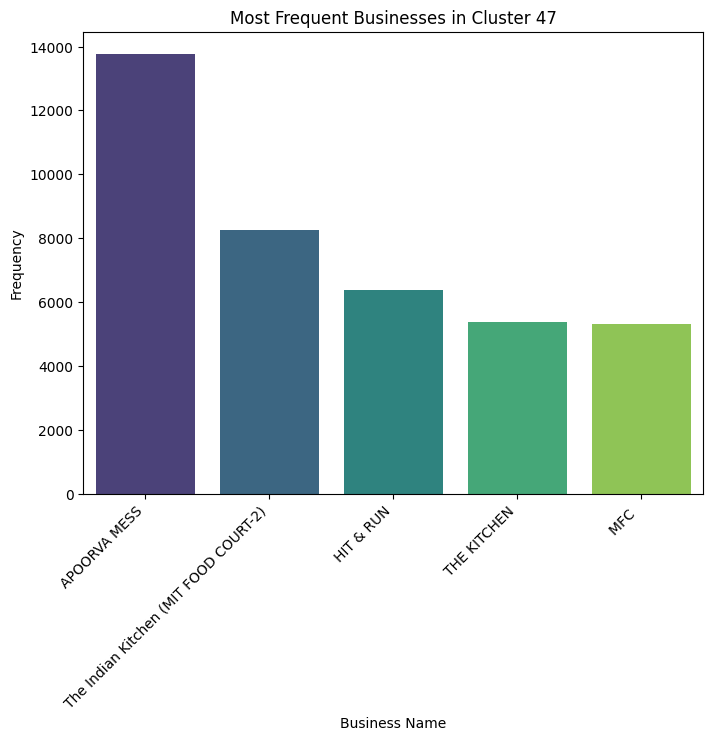

<ipython-input-94-d7784b893d4a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_businesses.index, y=most_frequent_businesses.values, palette='viridis')


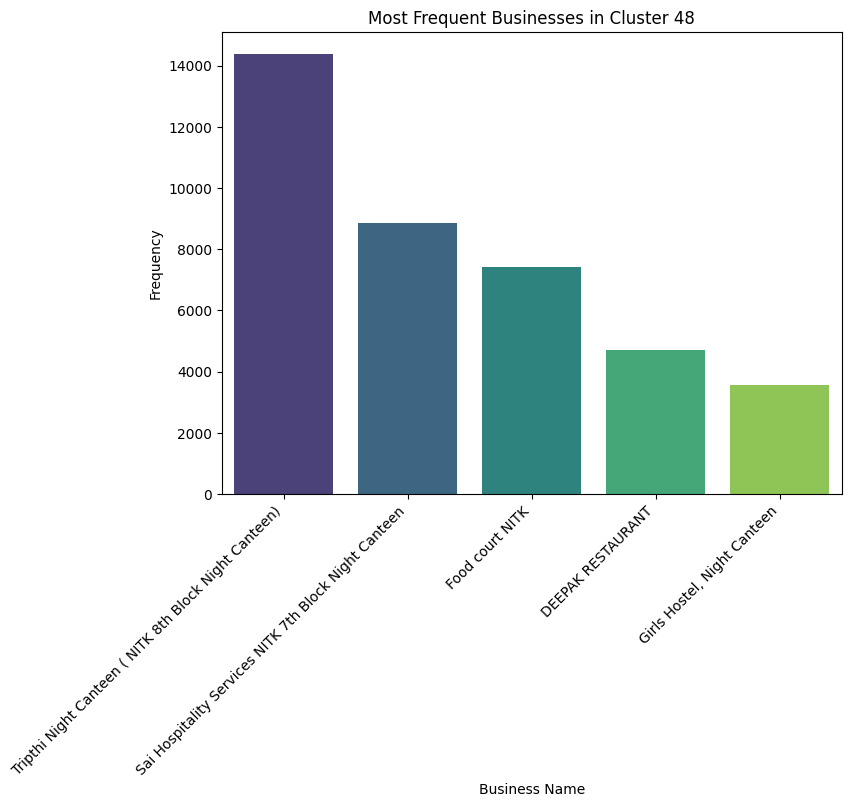

<ipython-input-94-d7784b893d4a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_businesses.index, y=most_frequent_businesses.values, palette='viridis')


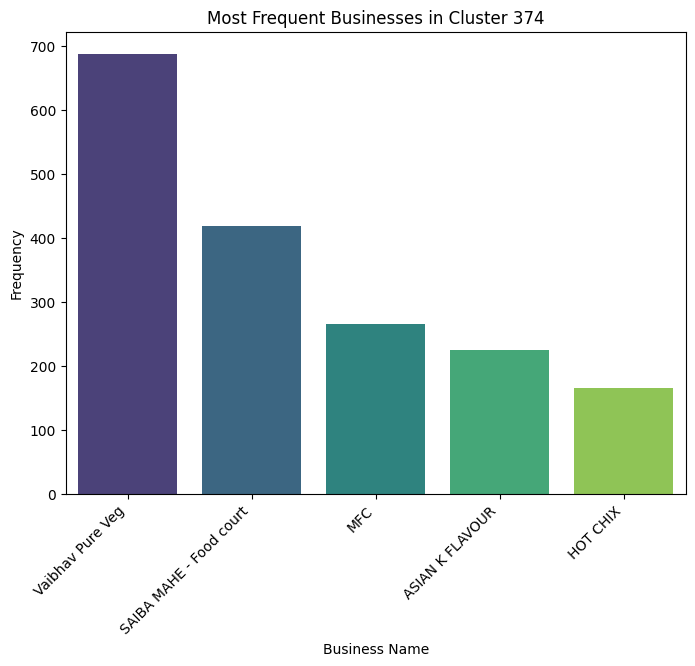

<ipython-input-94-d7784b893d4a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_businesses.index, y=most_frequent_businesses.values, palette='viridis')


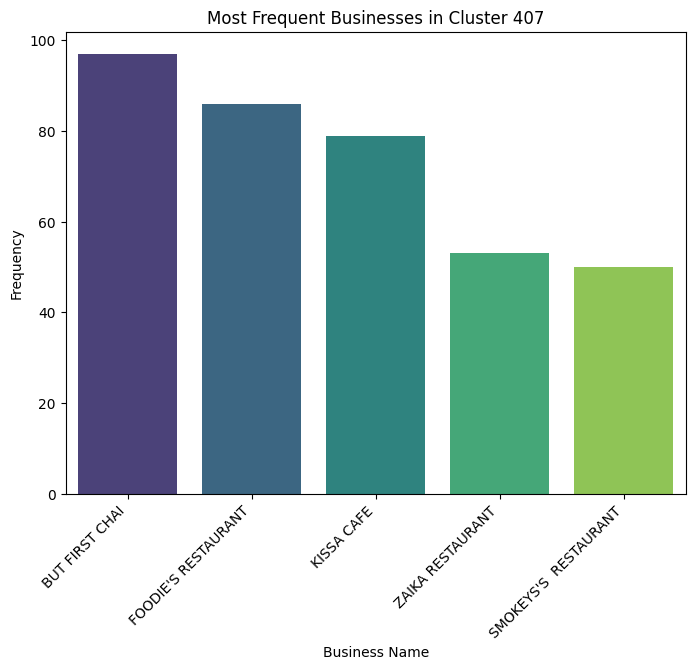

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the DataFrame for the specified Cluster IDs
selected_clusters = [47, 48, 374, 407]
filtered_df = unique_orders_df[unique_orders_df['Cluster ID'].isin(selected_clusters)]

for cluster_id, cluster_data in filtered_df.groupby('Cluster ID'):
    most_frequent_businesses = cluster_data['Business → Business Name'].value_counts().head(5)

    # Plot a separate bar plot for each cluster
    plt.figure(figsize=(8, 6))
    sns.barplot(x=most_frequent_businesses.index, y=most_frequent_businesses.values, palette='viridis')

    plt.title(f'Most Frequent Businesses in Cluster {cluster_id}')
    plt.xlabel('Business Name')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()



The most popular businesses from each cluster based on the number of orders

### Number of unique IDs in each cluster

<ipython-input-97-2f70a256d113>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_customers_count.index, y=unique_customers_count.values, palette='viridis')


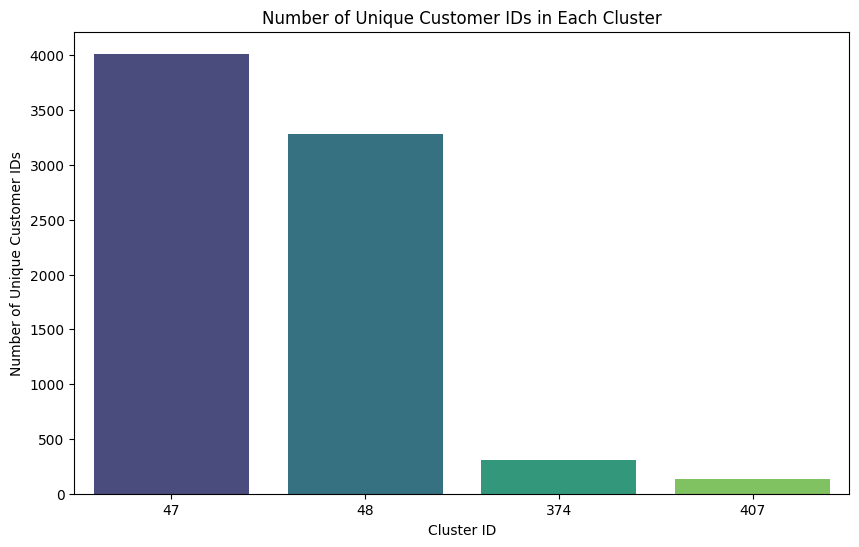

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_clusters = [47, 48, 374, 407]
filtered_df = unique_orders_df[unique_orders_df['Cluster ID'].isin(selected_clusters)]

plt.figure(figsize=(10, 6))
unique_customers_count = filtered_df.groupby('Cluster ID')['Customer ID'].nunique()
sns.barplot(x=unique_customers_count.index, y=unique_customers_count.values, palette='viridis')

plt.title('Number of Unique Customer IDs in Each Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Unique Customer IDs')

plt.show()

The number of unique customers in each of the clusters

### Distribution of Order Total based on clusters

<ipython-input-95-587464f3513c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Cluster ID', y='Order Total', data=unique_orders_df, jitter=True, alpha=0.7, palette='viridis')


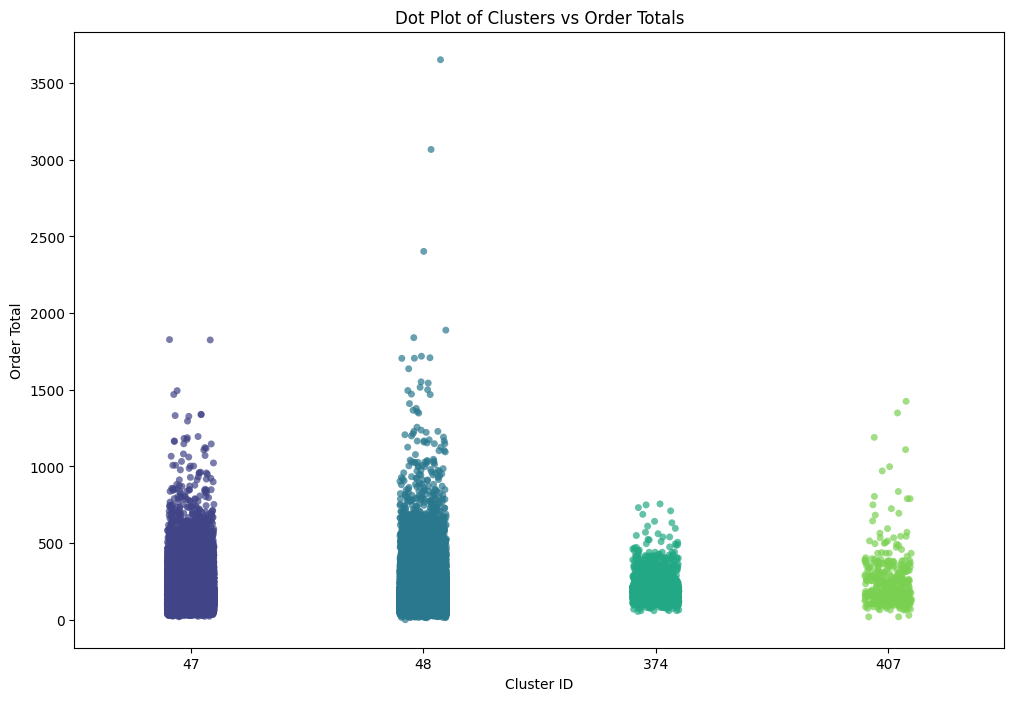

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.stripplot(x='Cluster ID', y='Order Total', data=unique_orders_df, jitter=True, alpha=0.7, palette='viridis')
plt.title('Dot Plot of Clusters vs Order Totals')
plt.xlabel('Cluster ID')
plt.ylabel('Order Total')
plt.show()

Earlier we observed that cluster 47 and 48 had comparable number of unique IDs, meaning comparable number of users. But here we notice the distribution of order total to be more spread out towards the costlier end. This could indicate that people of cluster 48 are willing to spend more on changepay.

### Cluster based number of unique IDs for top 5 businesses

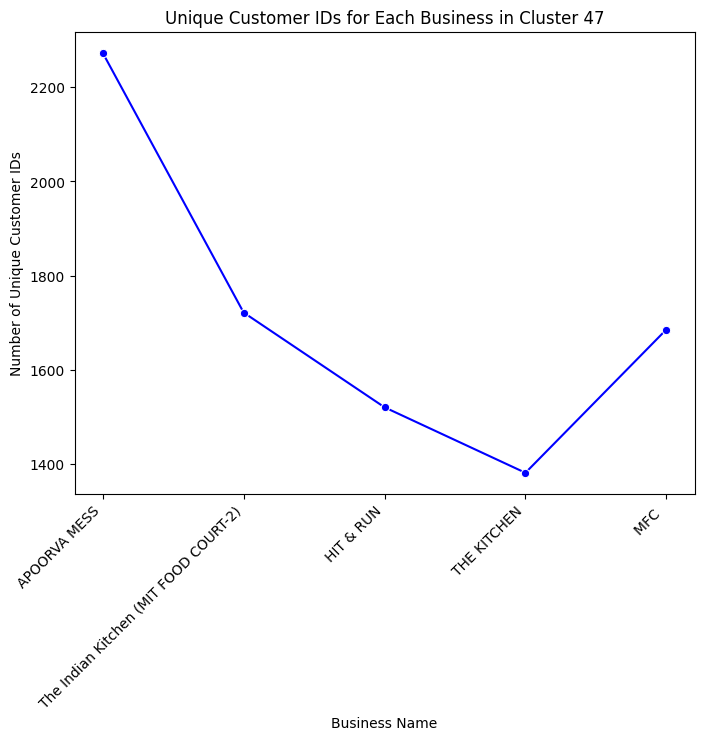

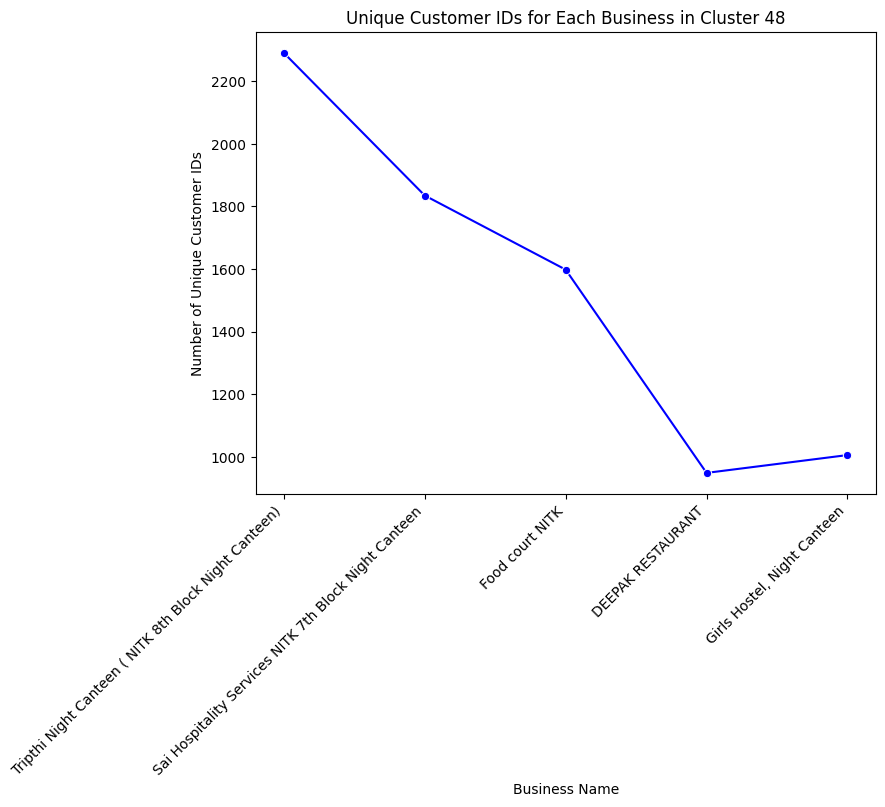

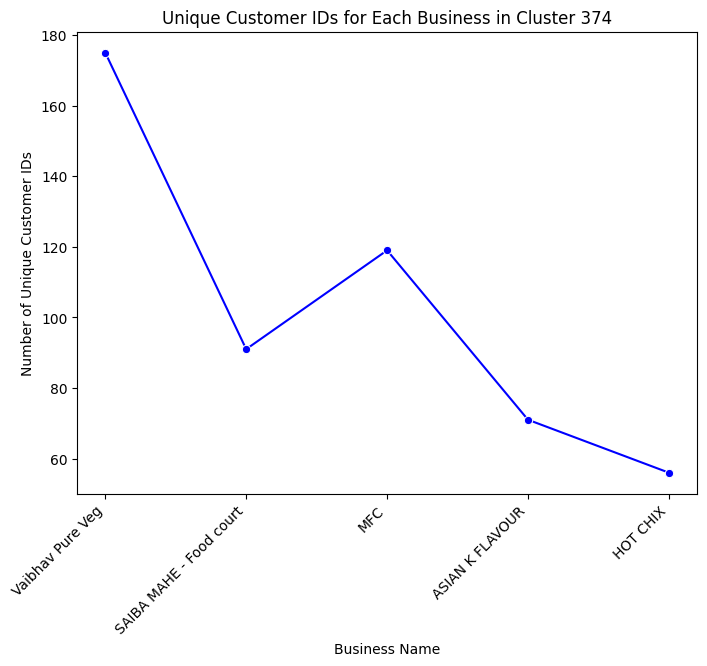

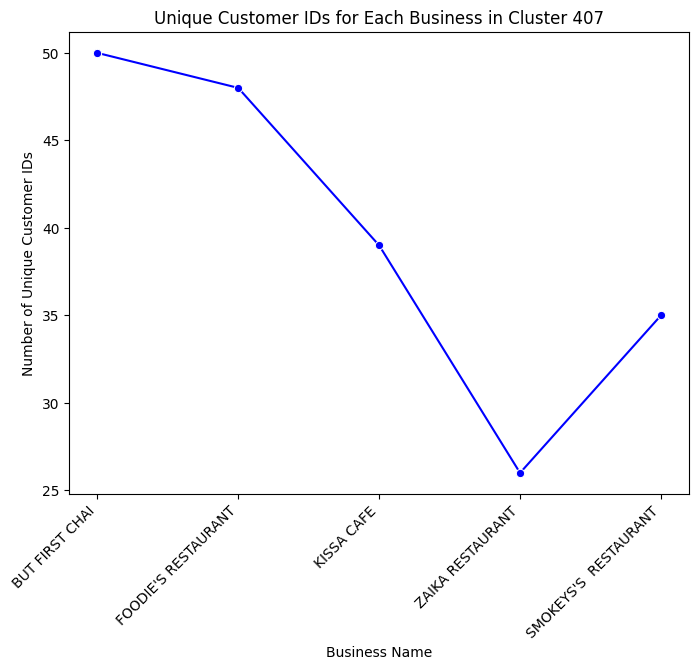

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the DataFrame for the specified Cluster IDs
selected_clusters = [47, 48, 374, 407]
filtered_df = unique_orders_df[unique_orders_df['Cluster ID'].isin(selected_clusters)]

for cluster_id, cluster_data in filtered_df.groupby('Cluster ID'):
    most_frequent_businesses = cluster_data['Business → Business Name'].value_counts().head(5)
    plt.figure(figsize=(8, 6))
    unique_customers_count = cluster_data.groupby('Business → Business Name')['Customer ID'].nunique().reindex(most_frequent_businesses.index)
    sns.lineplot(x=unique_customers_count.index, y=unique_customers_count.values, marker='o', color='b')

    plt.title(f'Unique Customer IDs for Each Business in Cluster {cluster_id}')
    plt.xlabel('Business Name')
    plt.ylabel('Number of Unique Customer IDs')
    plt.xticks(rotation=45, ha='right')

    plt.show()


Unique customers to place atleast one order in the food outlet in the most popular food outlets in each of the clusters.

We see that the number of unique customers is unevenly distributed in the top 5 restuarants based on order volume. More intricate analysis is necessary to segment the customers

### Cluster based time interval analysis

<ipython-input-99-9a8970cb85c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_orders_df['Created'] = pd.to_datetime(unique_orders_df['Created'])
<ipython-input-99-9a8970cb85c5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_orders_df['Hour'] = unique_orders_df['Created'].dt.hour
<ipython-input-99-9a8970cb85c5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

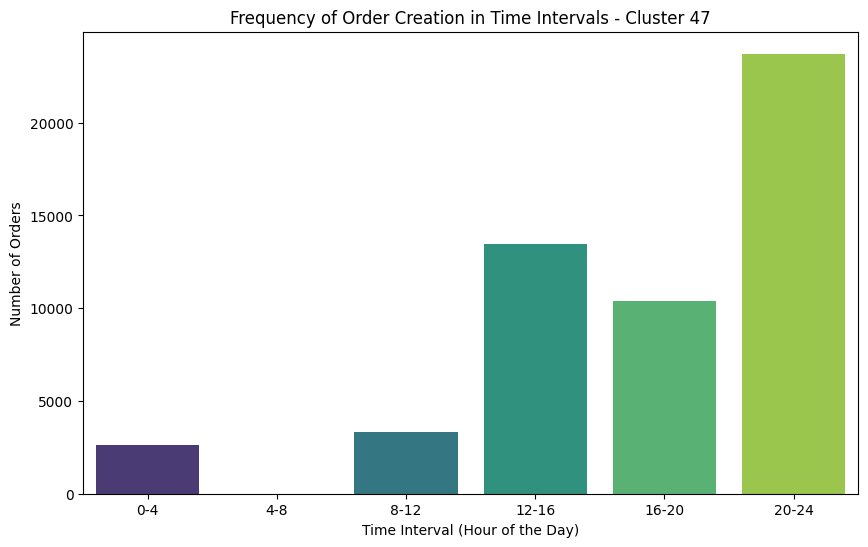

<ipython-input-99-9a8970cb85c5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time Interval', data=cluster_data, palette='viridis')


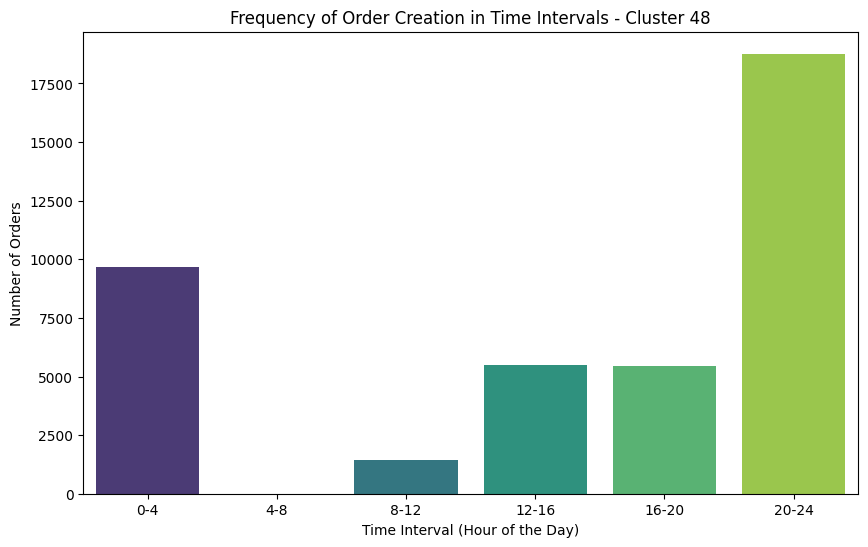

<ipython-input-99-9a8970cb85c5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time Interval', data=cluster_data, palette='viridis')


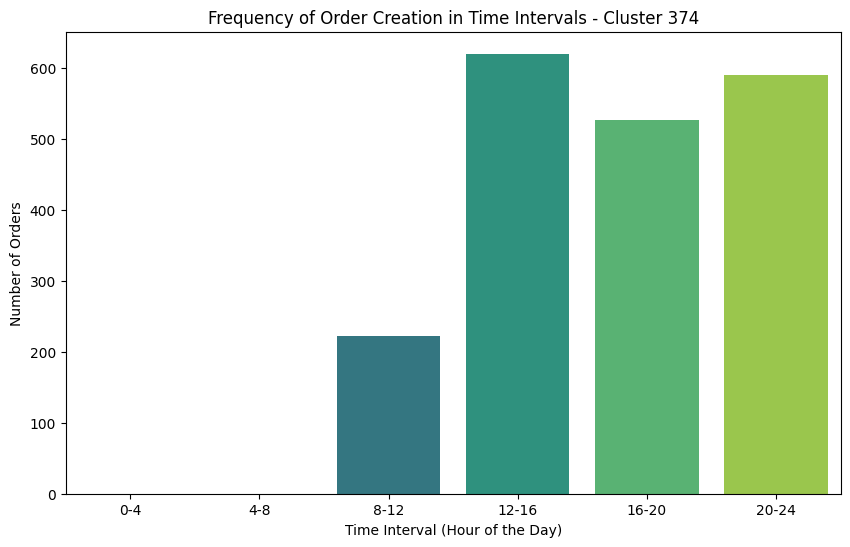

<ipython-input-99-9a8970cb85c5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time Interval', data=cluster_data, palette='viridis')


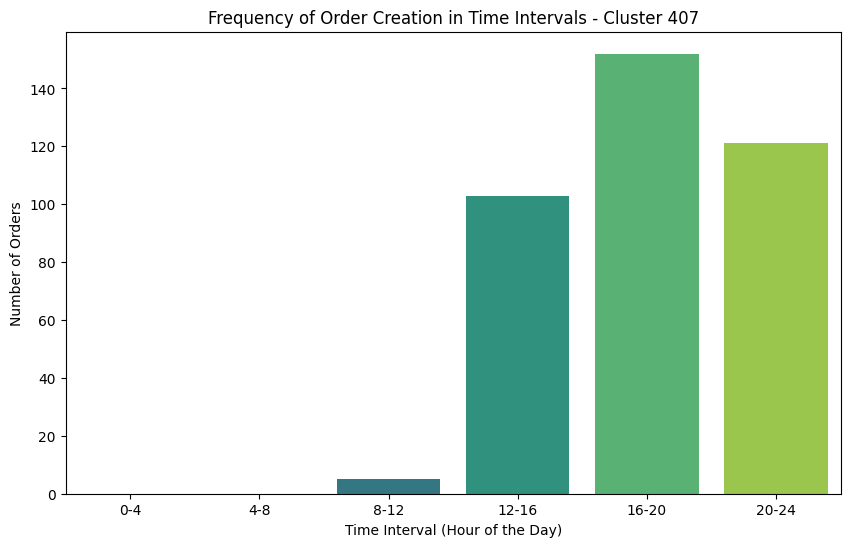

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'unique_orders_df' is your DataFrame with unique 'Order Short Number'
# Replace 'unique_orders_df' with your actual DataFrame if the name is different

# Convert 'Created' column to datetime format
unique_orders_df['Created'] = pd.to_datetime(unique_orders_df['Created'])

# Extract the hour of the day from the 'Created' column
unique_orders_df['Hour'] = unique_orders_df['Created'].dt.hour

# Divide a day into 6 intervals
unique_orders_df['Time Interval'] = pd.cut(unique_orders_df['Hour'], bins=6, labels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'])

# Filter the DataFrame for the specified Cluster IDs
selected_clusters = [47, 48, 374, 407]

# Plot the bar plot for each cluster
for cluster_id in selected_clusters:
    cluster_data = unique_orders_df[unique_orders_df['Cluster ID'] == cluster_id]

    # Plot the bar plot for the frequency of orders in each time interval
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Time Interval', data=cluster_data, palette='viridis')

    # Set plot labels and title
    plt.title(f'Frequency of Order Creation in Time Intervals - Cluster {cluster_id}')
    plt.xlabel('Time Interval (Hour of the Day)')
    plt.ylabel('Number of Orders')

    # Show the plot for each cluster
    plt.show()

The number of orders based on the time interval, in each cluster.
We observe that:
- There are no orders late night in clusters 407 and 374, indicating absence of Night canteens.
- afternoon (12-16) and night (20-24) are the most busy

##Customer Segmentation
Basic data on the behaviour of the customers on the platform

### Payment method preference and count based on cluster

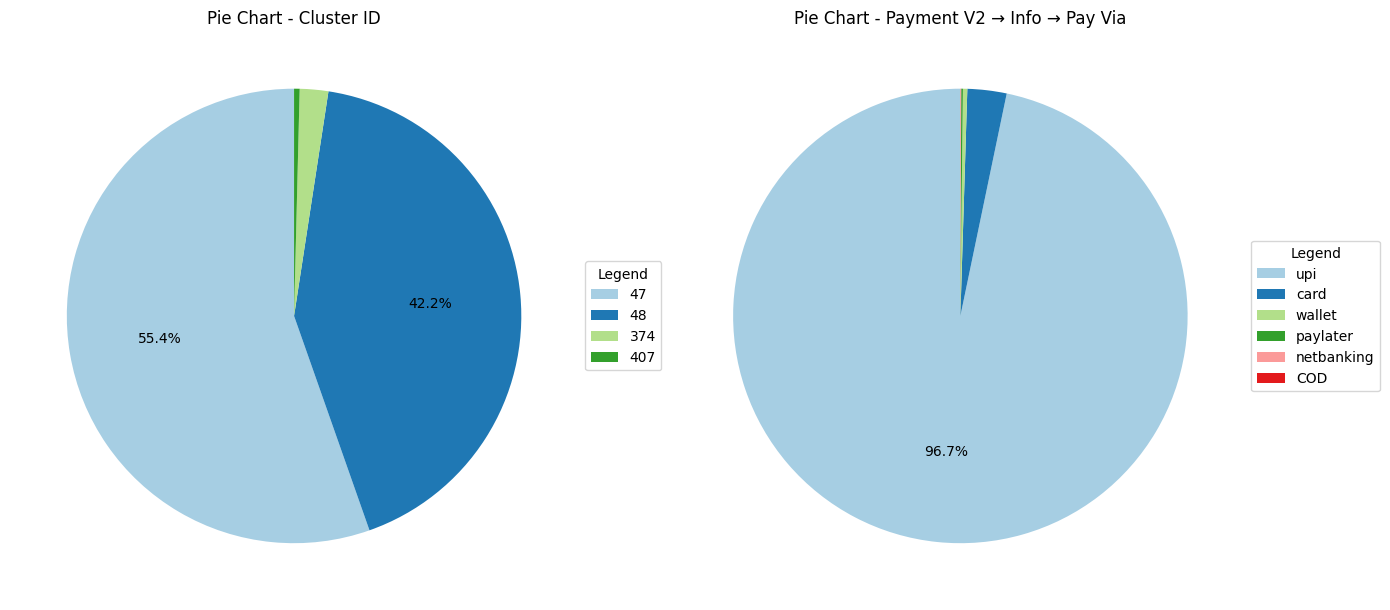

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
columns_to_analyze = ['Cluster ID', 'Payment V2 → Info → Pay Via']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_analyze), figsize=(14, 7))

# Categorical analysis with pie charts
for i, column in enumerate(columns_to_analyze):
    # Get value counts for the column
    value_counts = unique_orders_df[column].value_counts()

    # Plot pie chart with adjusted autopct
    wedges, texts, autotexts = axes[i].pie(value_counts, labels=None, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=90, colors=plt.cm.Paired.colors)
    axes[i].set_title(f'Pie Chart - {column}')

    # Add legend
    axes[i].legend(wedges, value_counts.index, title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()



- We see that more than half the unique users reside in cluster 47.
- We see that 96% of users use UPI for payment.

### Food rating pattern analysis

<ipython-input-101-b691ac67fdbb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating Value', data=filtered_df, palette='viridis')


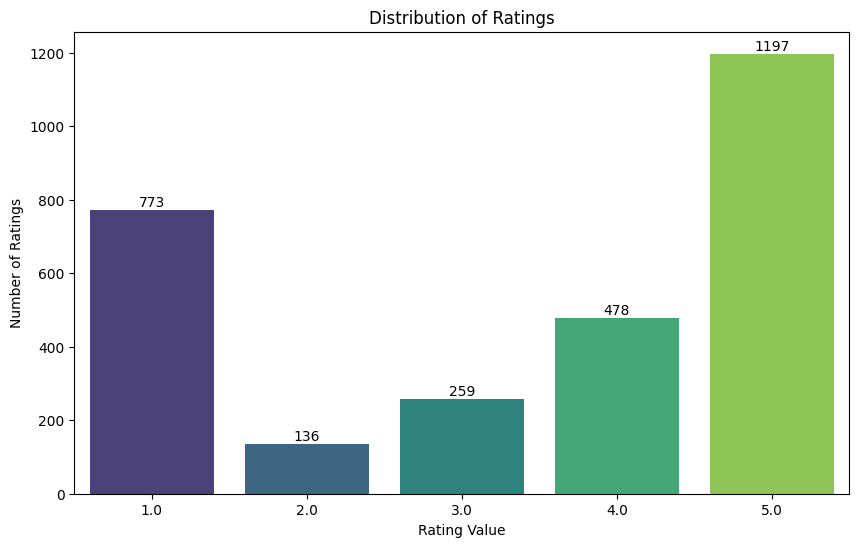

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where 'Rating Value' is not missing
filtered_df = unique_orders_df.dropna(subset=['Rating Value'])

# Plot the bar plot for the 'Rating Value' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating Value', data=filtered_df, palette='viridis')

# Annotate the exact number of ratings on each bar
for i, count in enumerate(filtered_df['Rating Value'].value_counts().sort_index()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Number of Ratings')

plt.show()

Quite an interesting observation here:
- There are only 2% orders that have recieved a rating.
- but among those most ratings are either 1 or 5, this could indicate that people only take the trouble to rate the food either when it is really good or when it is really bad.

### Customer loyalty analysis
A customer is considered to be loyal to a food outlet if they order >5 times from that place every month

<ipython-input-102-59b57e4f002c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_orders_df.loc[:, 'Created'] = pd.to_datetime(unique_orders_df['Created'])
<ipython-input-102-59b57e4f002c>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  unique_orders_df.loc[:, 'Created'] = pd.to_datetime(unique_orders_df['Created'])
<ipython-input-102-59b57e4f002c>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  unique_orders_df.loc[:, 'Month'] = unique_orders_df['Created'].dt.to_peri

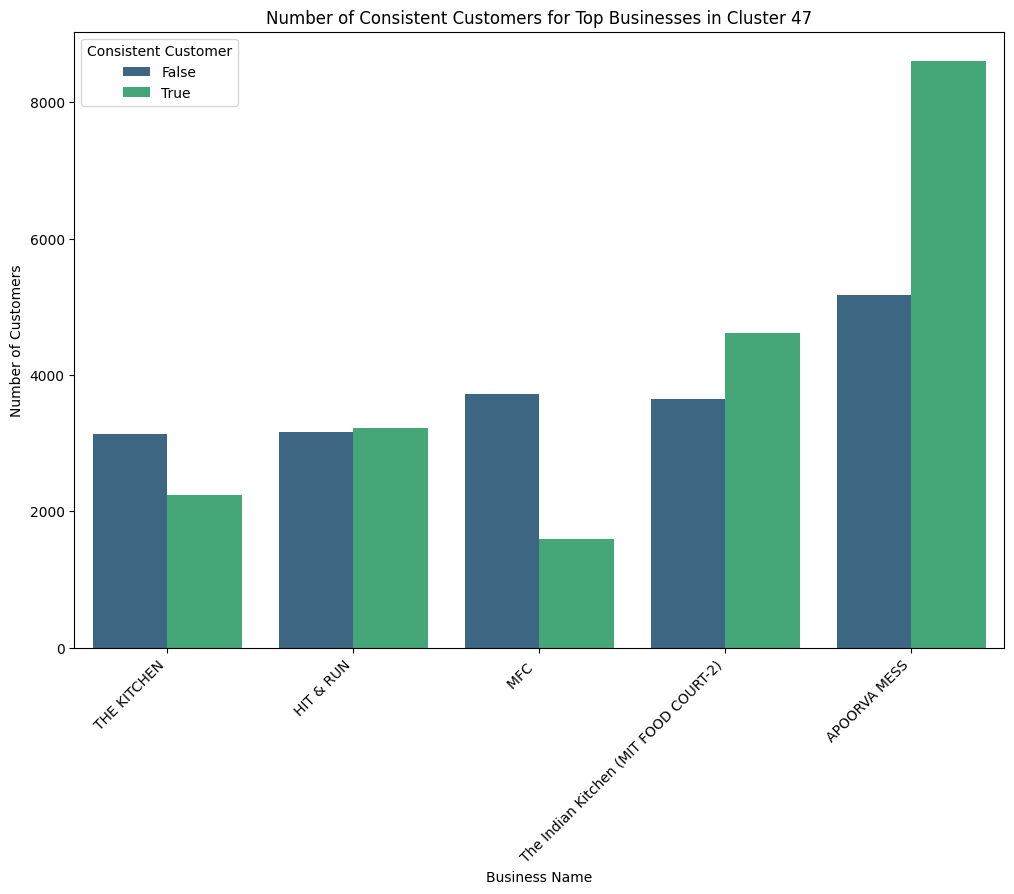

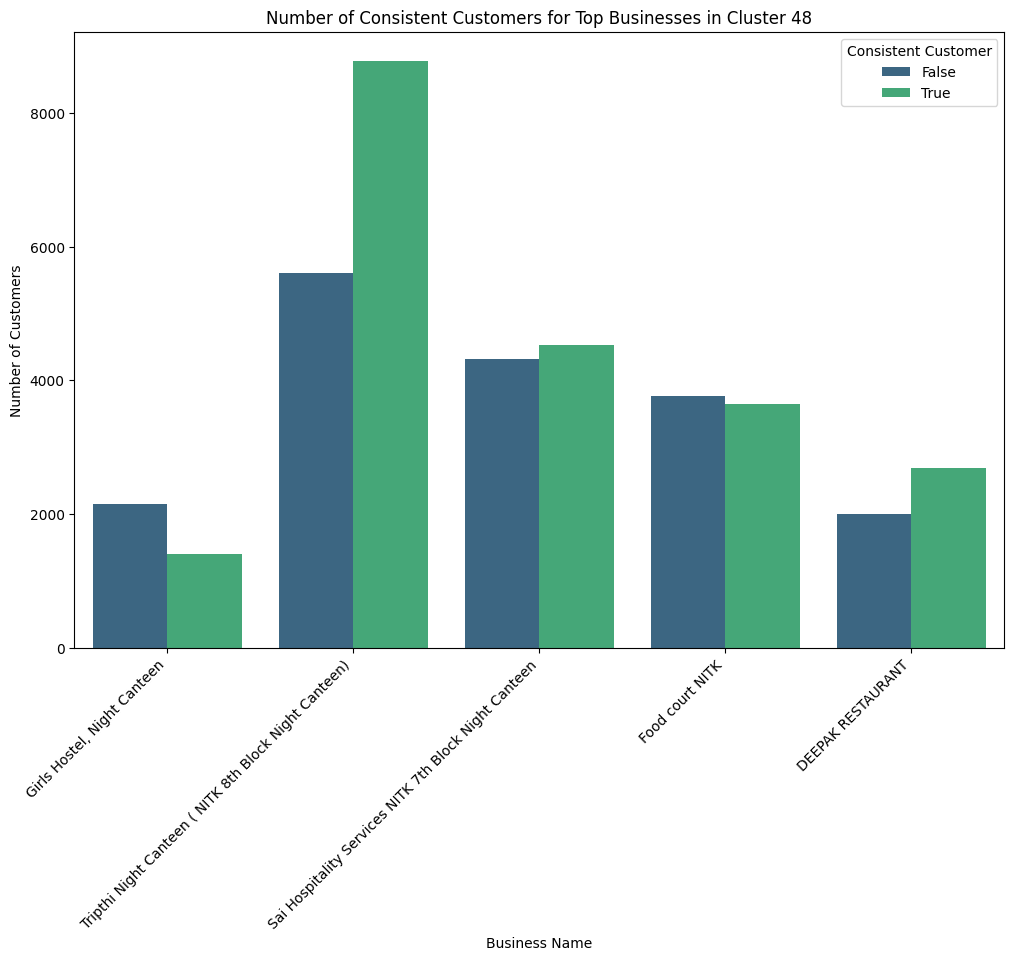

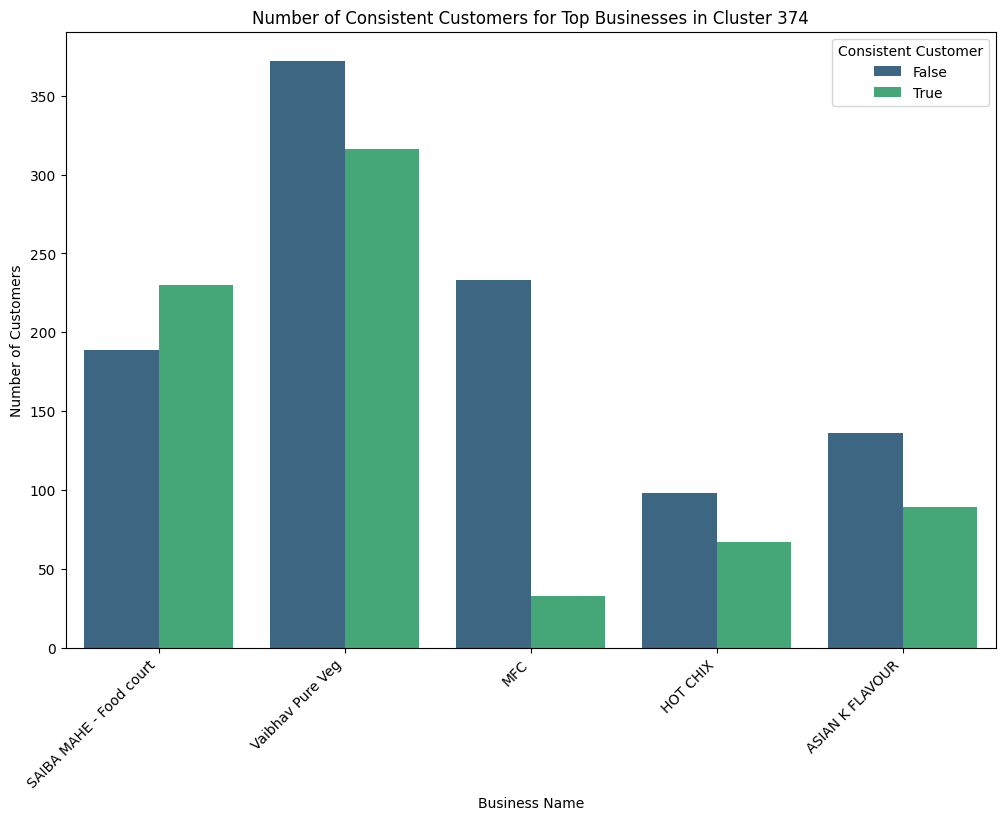

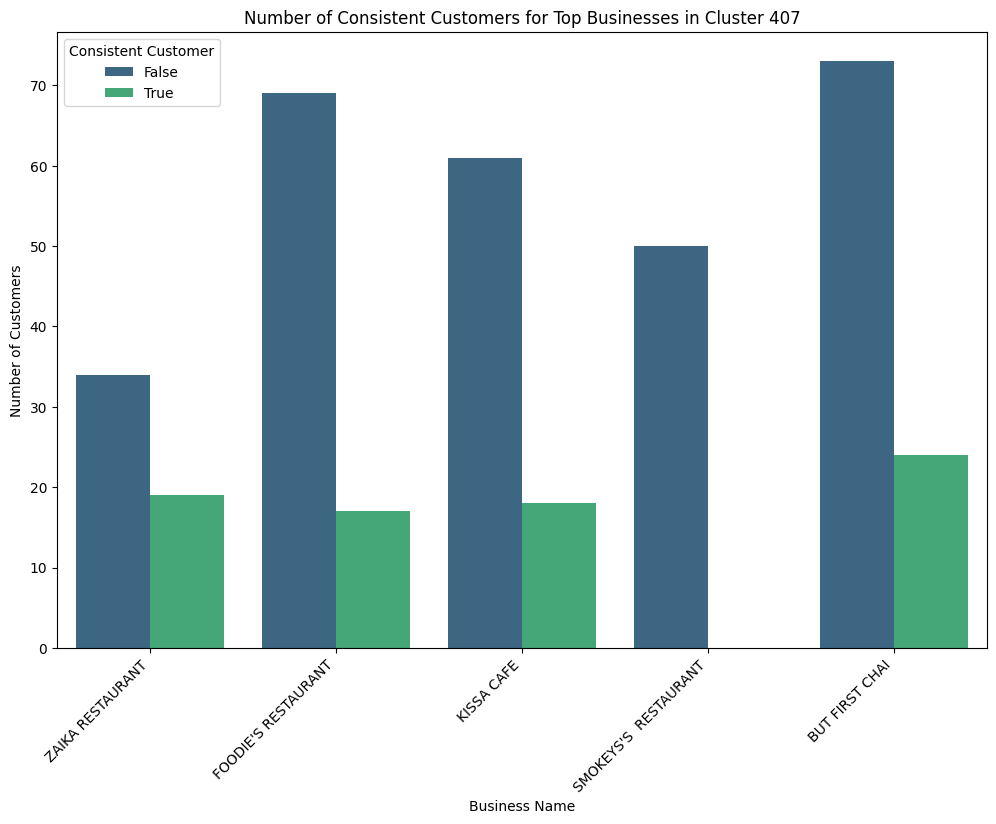

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unique_orders_df.loc[:, 'Created'] = pd.to_datetime(unique_orders_df['Created'])

# Extract the month from the 'Created' column
unique_orders_df.loc[:, 'Month'] = unique_orders_df['Created'].dt.to_period('M')

selected_clusters = [47, 48, 374, 407]
filtered_df = unique_orders_df[unique_orders_df['Cluster ID'].isin(selected_clusters)]

def is_consistent(row):
    same_month_count = row.groupby('Month').filter(lambda x: len(x) >= 5).shape[0]
    return same_month_count >= 5

consistent_customers = filtered_df.groupby(['Business → Business Name', 'Customer ID']).apply(is_consistent).reset_index(name='Consistent Customer')
filtered_df = pd.merge(filtered_df, consistent_customers, on=['Business → Business Name', 'Customer ID'], how='left')

for cluster_id in selected_clusters:
    top_businesses = filtered_df[filtered_df['Cluster ID'] == cluster_id]['Business → Business Name'].value_counts().head(5).index
    top_business_data = filtered_df[filtered_df['Business → Business Name'].isin(top_businesses)]
    plt.figure(figsize=(12, 8))
    sns.countplot(x='Business → Business Name', hue='Consistent Customer', data=top_business_data, palette='viridis')

    plt.title(f'Number of Consistent Customers for Top Businesses in Cluster {cluster_id}')
    plt.xlabel('Business Name')
    plt.ylabel('Number of Customers')

    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Consistent Customer', title_fontsize='10')
    plt.show()


A very interesting observation can be made here:
- The food outlets that made the most revenue, were the most popular, or had been servicing a large quantity of orders are all have a lot of loyal customers.
- The revenue of a food outlet has a decent correlation with the number of loyal customers
- The best outlets had more loyal customers than irregular ones - proving that for business success, customer retention plays a major role

##Shape Analysis

<ipython-input-103-e87643eafb03>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_orders_df['Created'] = pd.to_datetime(unique_orders_df['Created'])
<ipython-input-103-e87643eafb03>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  unique_orders_df['Month'] = unique_orders_df.index.to_period('M')
<ipython-input-103-e87643eafb03>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_orders_df['Month'] = unique_orders_df.index.to_period('M')


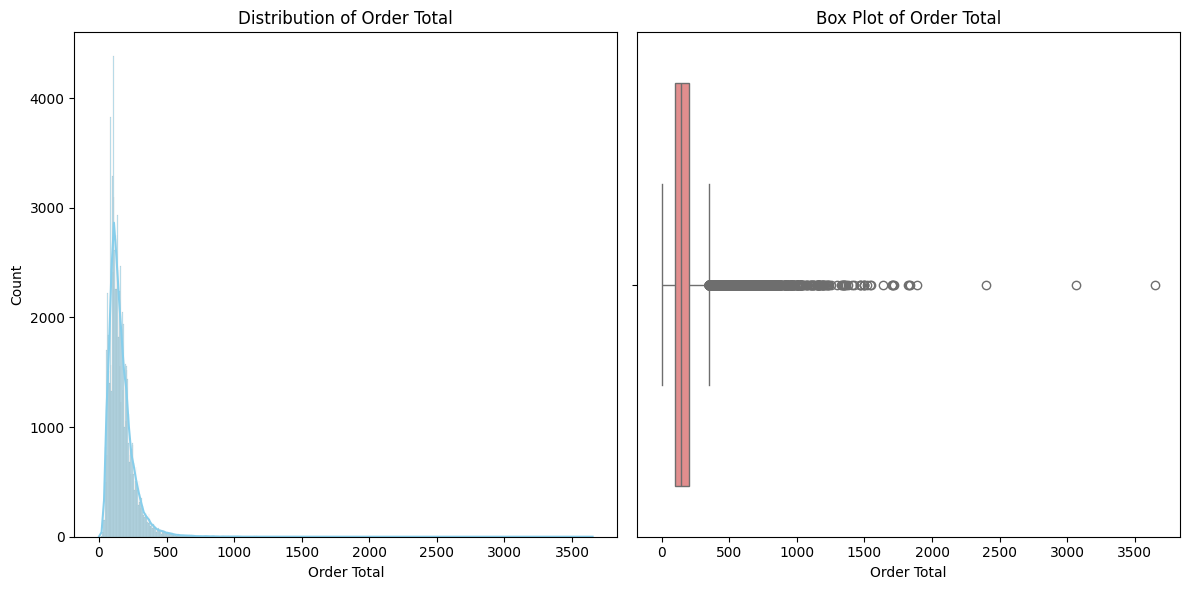

<ipython-input-103-e87643eafb03>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_order_totals = unique_orders_df.resample('M').sum()['Order Total']


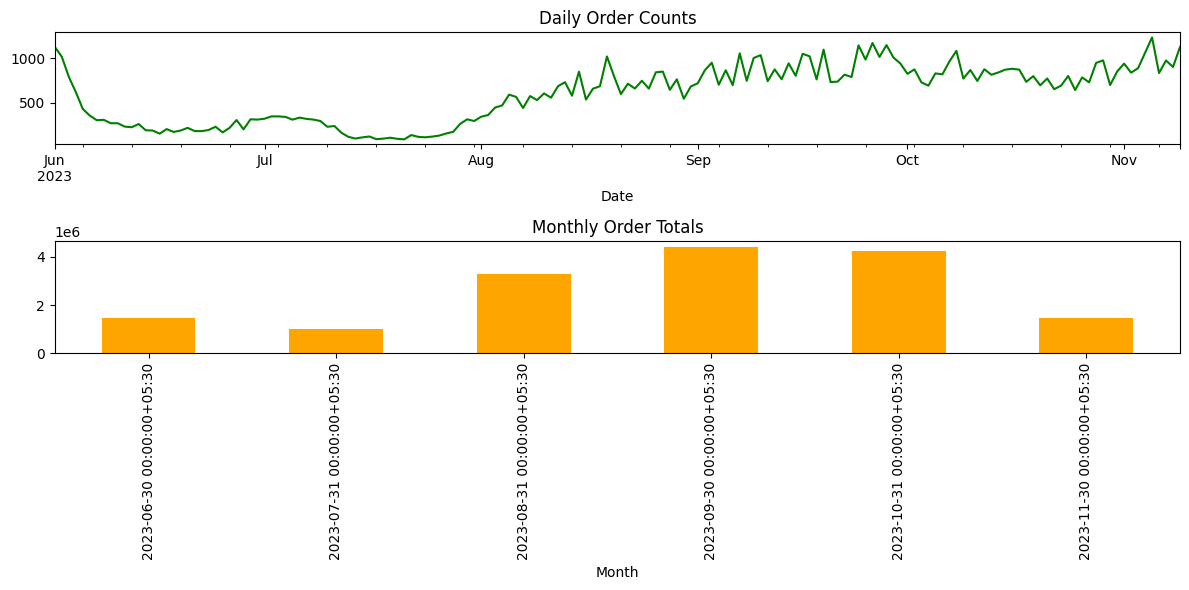

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



unique_orders_df['Created'] = pd.to_datetime(unique_orders_df['Created'])
unique_orders_df.set_index('Created', inplace=True)
unique_orders_df['Month'] = unique_orders_df.index.to_period('M')

# Shape analysis for 'Order Total'
plt.figure(figsize=(12, 6))

# Distribution plot for 'Order Total'
plt.subplot(1, 2, 1)
sns.histplot(unique_orders_df['Order Total'], kde=True, color='skyblue')
plt.title('Distribution of Order Total')

# Box plot for 'Order Total'
plt.subplot(1, 2, 2)
sns.boxplot(x=unique_orders_df['Order Total'], color='lightcoral')
plt.title('Box Plot of Order Total')

plt.tight_layout()
plt.show()

# Time Series Analysis for 'Created' column
plt.figure(figsize=(12, 6))

# Daily Order Counts
daily_order_counts = unique_orders_df.resample('D').size()
plt.subplot(2, 1, 1)
daily_order_counts.plot(title='Daily Order Counts', color='green')
plt.xlabel('Date')

# Monthly Order Totals
monthly_order_totals = unique_orders_df.resample('M').sum()['Order Total']
plt.subplot(2, 1, 2)
monthly_order_totals.plot(kind='bar', title='Monthly Order Totals', color='orange')
plt.xlabel('Month')

plt.tight_layout()
plt.show()


Insights from montly order analysis:
- Orders peak in oct/nov
- Least orders in july (possibly sem break)
- Most orders cost less than 500
